# **Conagra Project**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
import statsmodels.api as sm
from fixedeffect.iv import iv2sls, ivgmm, ivtest
from fixedeffect.fe import fixedeffect, did, getfe
from fixedeffect.utils.panel_dgp import gen_data
pd.set_option('display.max_columns', None)

In [2]:
# Check the Working Directory
os.getcwd()

'/Users/min/Desktop/2023 Spring Semester/BUAN 6337 Predictive Analytics for Data Science/Project/Data'

# Import Datasets

In [3]:
df_tablespreads = pd.read_csv('df_tablespreads.csv')

In [4]:
df_tablespreads_US = pd.read_csv('df_tablespreads_US.csv')

In [5]:
df_tablespreads_US_butter = pd.read_csv('df_tablespreads_US_butter.csv')

In [116]:
df_tablespreads_US_margarine = pd.read_csv('df_tablespreads_US_margarine.csv')

#### **Categorical Variable -- CAG Manufacturer Value**

In [7]:
len(df_tablespreads_US['CAG Manufacturer Value'].unique())

322

In [8]:
df_tablespreads_US_Conagra = df_tablespreads_US[df_tablespreads_US['CAG Manufacturer Value'] == 'CONAGRA BRANDS']
df_tablespreads_US_Conagra['CAG Major Brand Value'].unique()

array(['BLUE BONNET', 'EARTH BALANCE', 'FLEISCHMANNS', 'MOVE OVER BUTTER',
       'NUCOA', 'PARKAY', 'SMART BALANCE', 'SMART BEAT'], dtype=object)

# TableSpreads

## CAG Manufacturer Value for Tablespreads

In [9]:
# Count the Total Number of Tablespread Brands For Each Manufacturer
df_tablespreads_US_manufacturer_count = df_tablespreads_US.groupby('CAG Manufacturer Value')['CAG Major Brand Value'].nunique().sort_values(ascending = False).reset_index()
df_tablespreads_US_manufacturer_count

CAG Manufacturer Value  CAG Major Brand Value
0                         UPFIELD                     12
1                  CONAGRA BRANDS                      8
2               VENTURA FOODS LLC                      6
3        DAIRY FARMERS OF AMERICA                      6
4               DFS GOURMET FOODS                      4
..                            ...                    ...
317               HEART FOODS LLC                      1
318   HARTZLER FAMILY DAIRY, INC.                      1
319  HANSENS FARM FRESH DAIRY INC                      1
320                  GUIDAS DAIRY                      1
321                 ZVIJEZDA D.D.                      1

[322 rows x 2 columns]

In [10]:
# Count the Total Number of Tablespread Brands For Congara Brands
df_tablespreads_US_conagra = df_tablespreads_US[df_tablespreads_US['CAG Manufacturer Value'].apply(lambda x: x in ["CONAGRA BRANDS"])]
df_tablespreads_US_conagra_brands_count = df_tablespreads_US_conagra.groupby('CAG Manufacturer Value')['CAG Major Brand Value'].nunique().sort_values(ascending = False).reset_index()
df_tablespreads_US_conagra_brands_count

CAG Manufacturer Value  CAG Major Brand Value
0         CONAGRA BRANDS                      8

In [11]:
# The Tablespread Brands For Congara Brands
df_tablespreads_US_conagra['CAG Major Brand Value'].unique()

array(['BLUE BONNET', 'EARTH BALANCE', 'FLEISCHMANNS', 'MOVE OVER BUTTER',
       'NUCOA', 'PARKAY', 'SMART BALANCE', 'SMART BEAT'], dtype=object)

In [12]:
# Count the Total Number of Tablespread Products For Each Manufacturer
df_tablespreads_US_manufacturer_count2 = df_tablespreads_US.groupby('CAG Manufacturer Value')['UPC 13 digit'].nunique().sort_values(ascending = False).reset_index()
df_tablespreads_US_manufacturer_count2

CAG Manufacturer Value  UPC 13 digit
0                     PRIVATE LABEL           705
1                           UPFIELD           104
2                    CONAGRA BRANDS            85
3                  LAND O'LAKES INC            75
4      CHALLENGE DAIRY PRODUCTS INC            35
..                              ...           ...
317               LATTERIA SORESINA             1
318  LEVER BROTHERS WEST INDIES LTD             1
319                 LIEBERMAN DAIRY             1
320                LOCAL SOURCE LLC             1
321                   ZVIJEZDA D.D.             1

[322 rows x 2 columns]

In [13]:
# Count the Total Number of Tablespreads Products For Congara Brands
df_tablespreads_US_conagra_products_count = df_tablespreads_US_conagra.groupby('CAG Manufacturer Value')['UPC 13 digit'].nunique().sort_values(ascending = False).reset_index()
df_tablespreads_US_conagra_products_count

CAG Manufacturer Value  UPC 13 digit
0         CONAGRA BRANDS            85

In [14]:
# Count the Total Number of Tablespreads Products For Each Brands
df_tablespreads_US_products_count_by_brand = df_tablespreads_US.groupby('CAG Major Brand Value')['UPC 13 digit'].nunique().sort_values(ascending = False).reset_index()
df_tablespreads_US_products_count_by_brand

CAG Major Brand Value  UPC 13 digit
0                    PRIVATE LABEL           705
1                     LAND O LAKES            75
2                    COUNTRY CROCK            45
3    I CANT BELIEVE ITS NOT BUTTER            29
4                    SMART BALANCE            26
..                             ...           ...
377               JABBA FINE FOODS             1
378                  JANSAL VALLEY             1
379             KIMBALL BROOK FARM             1
380                      KITE HILL             1
381                       ZVIJEZDA             1

[382 rows x 2 columns]

In [15]:
# Count the Total Number of Tablespreads Products For Congara Brands
df_tablespreads_US_butter_conagra = df_tablespreads_US_butter[df_tablespreads_US_butter['CAG Major Brand Value'].apply(lambda x: x in ["BLUE BONNET", "SMART BALANCE", "EARTH BALANCE", "PARKAY"])]
df_tablespreads_US_butter_conagra_products_count_by_brand = df_tablespreads_US_butter_conagra.groupby('CAG Major Brand Value')['UPC 13 digit'].nunique().sort_values(ascending = False).reset_index()
df_tablespreads_US_butter_conagra_products_count_by_brand

CAG Major Brand Value  UPC 13 digit
0         SMART BALANCE             3
1           BLUE BONNET             1

## CAG Form Value for Tablespreads

In [16]:
# Check the Unique Tablespreads CAG Forms
df_tablespreads_US['CAG Form Value'].unique()

array(['ALL OTHER FORM', 'STICKS', 'TUBS', 'SPRAY/SQUEEZE', nan],
      dtype=object)

In [17]:
# Count the Total Number of Tablespreads Products by CAG Form
df_tablespreads_US.groupby('CAG Form Value')['UPC 13 digit'].nunique().sort_values(ascending = False).reset_index()

CAG Form Value  UPC 13 digit
0            TUBS           760
1          STICKS           693
2  ALL OTHER FORM           454
3   SPRAY/SQUEEZE            19

## CAG Tier Value for Tablespreads

In [18]:
# Check the Unique Tablespreads CAG Tier Value
df_tablespreads_US['CAG Tier Value'].unique()

array(['VALUE', 'PREMIUM', 'MAINSTREAM', 'SUPER PREMIUM', nan, 'TBD'],
      dtype=object)

In [19]:
# Count the Total Number of Tablespreads Products by CAG Tier Value
df_tablespreads_US.groupby('CAG Tier Value')['UPC 13 digit'].nunique().sort_values(ascending = False).reset_index()

CAG Tier Value  UPC 13 digit
0     MAINSTREAM           862
1  SUPER PREMIUM           495
2        PREMIUM           429
3          VALUE           127
4            TBD            13

## Total Sales for Tablespreads

In [20]:
# Check the Total Sales by CAG Manufacturer Value
df_tablespreads_US_tol_sales_by_manufacturer = df_tablespreads_US.groupby('CAG Manufacturer Value').agg({'Total Sales': 'sum'}).sort_values(by = ['Total Sales'], ascending = False).reset_index()

# Adjust the Dataframe about the Total Sales by Manufacturer
df_tablespreads_US_tol_sales_by_manufacturer['Rank'] = [i for i in range(1, 323)]
df_tablespreads_US_tol_sales_by_manufacturer.set_index("Rank", inplace = True)
df_tablespreads_US_tol_sales_by_manufacturer

CAG Manufacturer Value   Total Sales
Rank                                                   
1                           PRIVATE LABEL  5.458622e+09
2                        LAND O'LAKES INC  5.360544e+09
3                                 UPFIELD  4.366525e+09
4                          CONAGRA BRANDS  1.964274e+09
5                                   ORNUA  1.394390e+09
...                                   ...           ...
318                  GUERNSEY FARMS DAIRY  3.943674e+01
319                    BERKELEY FARMS INC  2.286250e+01
320   HERITAGE FAMILY SPECIALTY FOODS INC  9.663790e+00
321                       SWIFT & COMPANY  3.250000e+00
322                WEST LYNN CREAMERY INC  1.596000e-01

[322 rows x 2 columns]

In [21]:
# Check the Rank of Conagra Brand in Tablespreads and Make a Seperate Dataframe
df_tablespreads_US_tot_sales_congara_manu = df_tablespreads_US_tol_sales_by_manufacturer[df_tablespreads_US_tol_sales_by_manufacturer['CAG Manufacturer Value'] == 'CONAGRA BRANDS']
df_tablespreads_US_tot_sales_congara_manu

CAG Manufacturer Value   Total Sales
Rank                                     
4            CONAGRA BRANDS  1.964274e+09

In [22]:
# Make a Seperate Dataframe for Top 10 Tablespreads Manufacturer
df_tablespreads_US_tol_sales_by_manufacturer_top10 = df_tablespreads_US_tol_sales_by_manufacturer[df_tablespreads_US_tol_sales_by_manufacturer.index <= 10]

In [23]:
# Get the Tablespreads Top 10 Manufacturer List based on Total Sales
df_tablespreads_US_tot_sales_by_manufacturer_top10_list = list(df_tablespreads_US_tol_sales_by_manufacturer_top10['CAG Manufacturer Value'])
df_tablespreads_US_tot_sales_by_manufacturer_top10_list

['PRIVATE LABEL',
 "LAND O'LAKES INC",
 'UPFIELD',
 'CONAGRA BRANDS',
 'ORNUA',
 'CHALLENGE DAIRY PRODUCTS INC',
 'DAIRY FARMERS OF AMERICA',
 'TILLAMOOK COUNTY CREAMERY',
 'CABOT CREAMERY, INC.',
 'DARIGOLD INC']

In [24]:
# Keep the Top 10 Manufacturer and Set the Others as "Others"
df_tablespreads_US['CAG Manufacturer Value'] = df_tablespreads_US['CAG Manufacturer Value'].apply(lambda x: x if x in df_tablespreads_US_tot_sales_by_manufacturer_top10_list else 'Others')

In [25]:
# Check the Total Sales by CAG Manufacturer Value based on the Generated New Manufacturer Categories
df_tablespreads_US_tol_sales_by_manufacturer = df_tablespreads_US.groupby('CAG Manufacturer Value').agg({'Total Sales': 'sum'}).sort_values(by = ['Total Sales'], ascending = False).reset_index()
df_tablespreads_US_tol_sales_by_manufacturer['Rank'] = [i for i in range(1, 12)]
df_tablespreads_US_tol_sales_by_manufacturer.set_index("Rank", inplace = True)
df_tablespreads_US_tol_sales_by_manufacturer

CAG Manufacturer Value   Total Sales
Rank                                            
1                    PRIVATE LABEL  5.458622e+09
2                 LAND O'LAKES INC  5.360544e+09
3                          UPFIELD  4.366525e+09
4                   CONAGRA BRANDS  1.964274e+09
5                           Others  1.568321e+09
6                            ORNUA  1.394390e+09
7     CHALLENGE DAIRY PRODUCTS INC  1.022208e+09
8         DAIRY FARMERS OF AMERICA  3.311266e+08
9        TILLAMOOK COUNTY CREAMERY  2.210055e+08
10            CABOT CREAMERY, INC.  1.942443e+08
11                    DARIGOLD INC  1.529751e+08

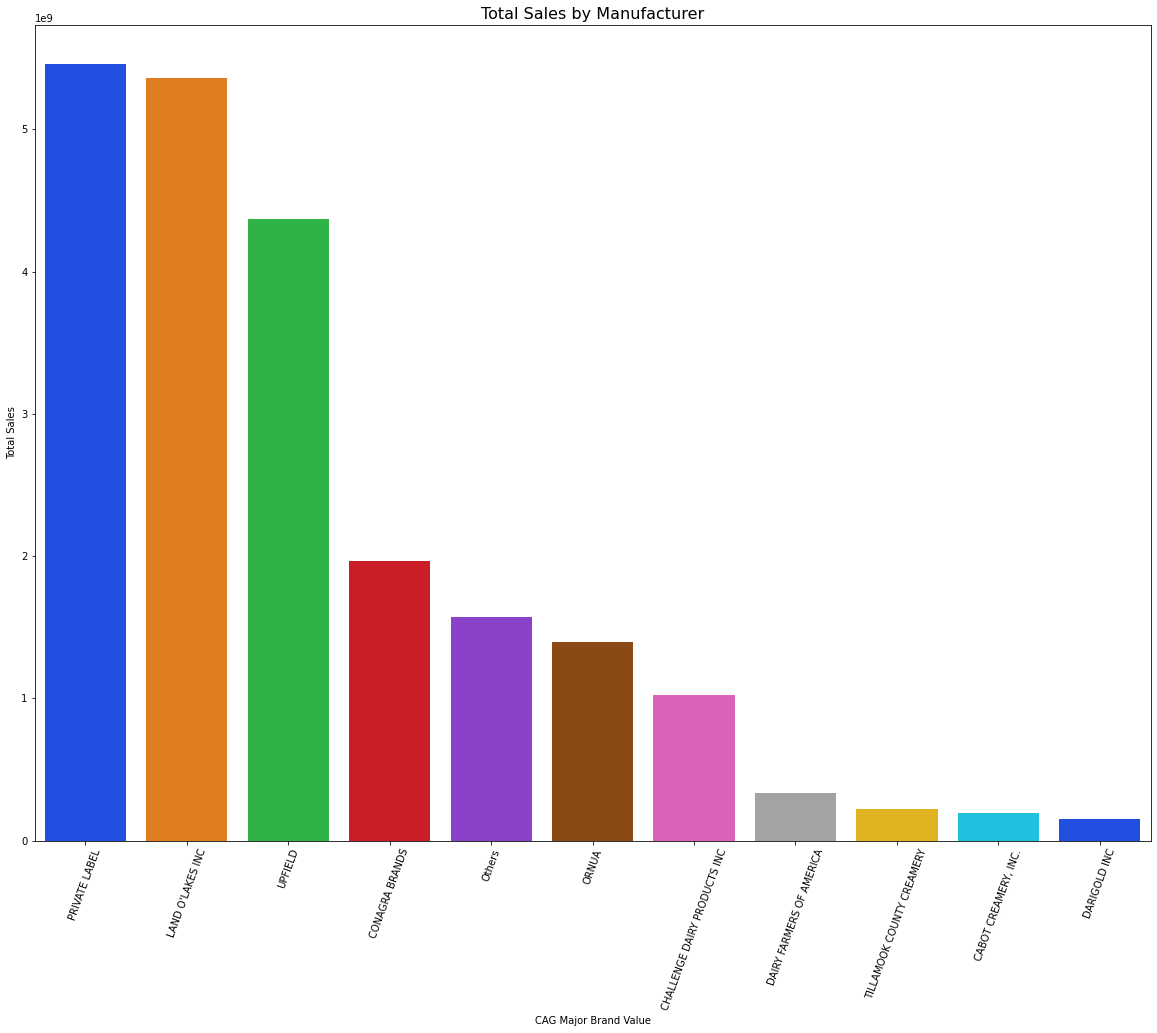

In [26]:
# Barplot for Total Sales by Manufacturer
plt.figure(figsize = (20, 15))
sns.barplot(x= df_tablespreads_US_tol_sales_by_manufacturer['CAG Manufacturer Value'], y = 'Total Sales', palette = 'bright', data = df_tablespreads_US_tol_sales_by_manufacturer)
plt.xticks(rotation=70)
plt.xlabel('CAG Major Brand Value')
plt.ylabel('Total Sales')
plt.title('Total Sales by Manufacturer', fontsize = 16)
plt.show()

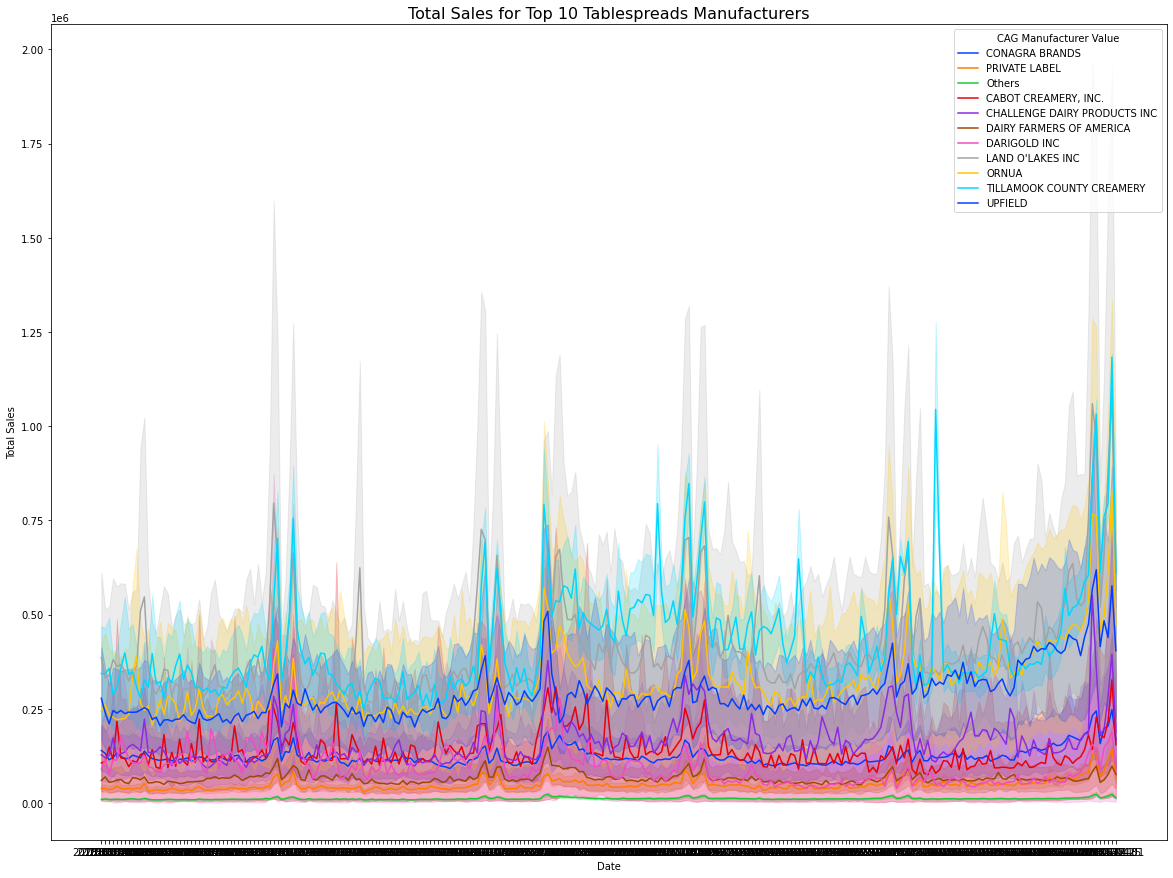

In [27]:
# Lineplots for Total Sales by Manufacturer by Date
plt.figure(figsize = (20, 15))
sns.lineplot(x="Date", y = 'Total Sales', hue="CAG Manufacturer Value", palette = 'bright', data = df_tablespreads_US)
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Total Sales for Top 10 Tablespreads Manufacturers', fontsize = 16)
plt.show()

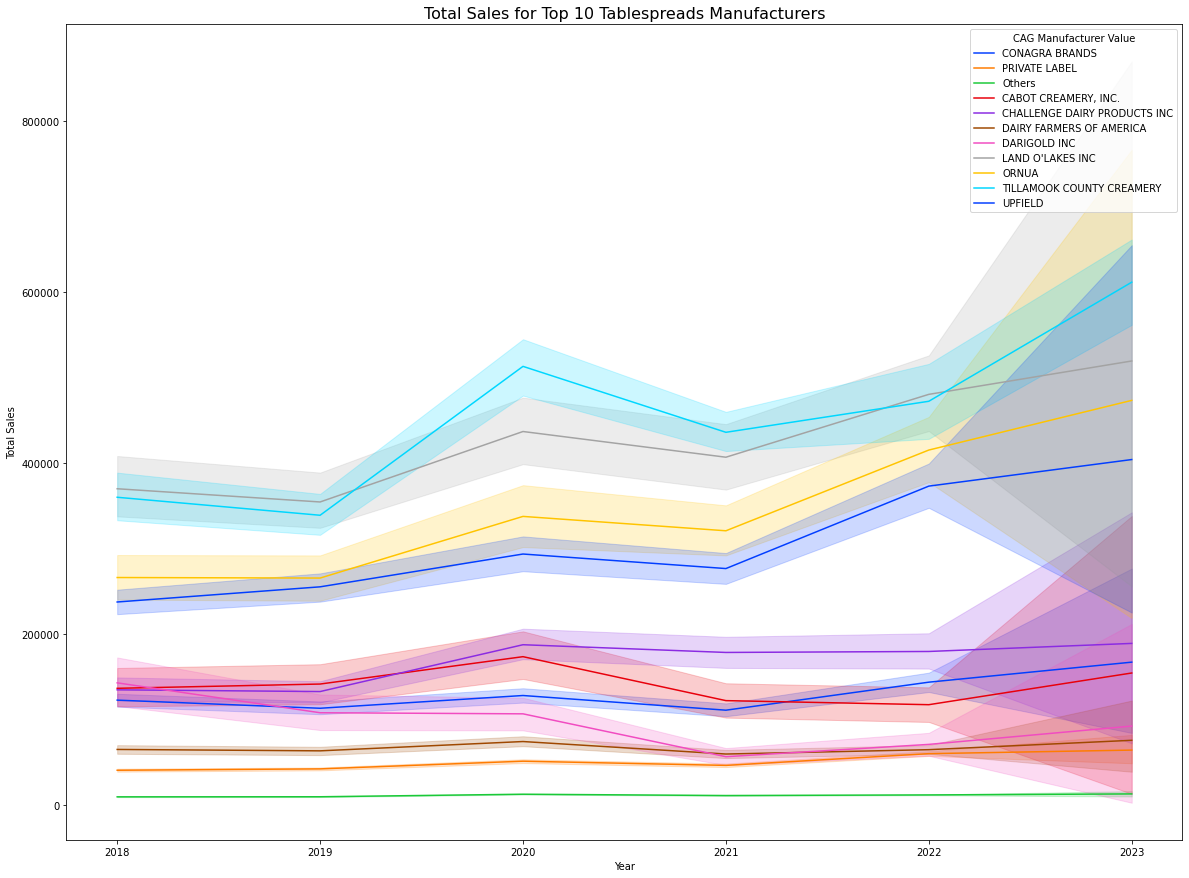

In [28]:
# Lineplots for Total Sales by Manufacturer by Year
plt.figure(figsize = (20, 15))
sns.lineplot(x="Year", y = 'Total Sales', hue="CAG Manufacturer Value", palette = 'bright', data = df_tablespreads_US)
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Total Sales for Top 10 Tablespreads Manufacturers', fontsize = 16)
plt.show()

# Butter/ Blends

## CAG Manufacturer Value for Butter

In [76]:
# Count the Total Number of Butter Brands For Each Manufacturer
df_tablespreads_US_butter_manufacturer_count = df_tablespreads_US_butter.groupby('CAG Manufacturer Value')['CAG Major Brand Value'].nunique().sort_values(ascending = False).reset_index()
df_tablespreads_US_butter_manufacturer_count

CAG Manufacturer Value  CAG Major Brand Value
0                         Others                    287
1       DAIRY FARMERS OF AMERICA                      5
2   CHALLENGE DAIRY PRODUCTS INC                      4
3              ALCAM CREAMERY CO                      3
4                   DARIGOLD INC                      2
5            PRAIRIE FARMS DAIRY                      2
6              POST HOLDINGS INC                      2
7               KELLERS CREAMERY                      2
8                 CONAGRA BRANDS                      2
9                  DANONE US LLC                      1
10     HILAND DAIRY FOODS CO LLC                      1
11            KATE'S HMDE BUTTER                      1
12          CABOT CREAMERY, INC.                      1
13       LACTALIS AMERICAN GROUP                      1
14              LAND O'LAKES INC                      1
15                ORGANIC VALLEY                      1
16                         ORNUA                      1
17        CLOVER STORNETTA FARMS                      1
18               CHEF SHAMY INC.                      1
19                 PRIVATE LABEL                      1
20     TILLAMOOK COUNTY CREAMERY                      1
21                   VITAL FARMS                      1

In [77]:
# Count the Total Number of Butter Brands For Congara Brands
df_tablespreads_US_butter_conagra = df_tablespreads_US_butter[df_tablespreads_US_butter['CAG Manufacturer Value'].apply(lambda x: x in ["CONAGRA BRANDS"])]
df_tablespreads_US_butter_conagra_brands_count = df_tablespreads_US_butter_conagra.groupby('CAG Manufacturer Value')['CAG Major Brand Value'].nunique().sort_values(ascending = False).reset_index()
df_tablespreads_US_butter_conagra_brands_count

CAG Manufacturer Value  CAG Major Brand Value
0         CONAGRA BRANDS                      2

In [78]:
# The Two Butter Brands For Congara Brands
df_tablespreads_US_butter_conagra['CAG Major Brand Value'].unique()

array(['SMART BALANCE', 'BLUE BONNET'], dtype=object)

In [79]:
# Count the Total Number of Butter Products For Each Manufacturer
df_tablespreads_US_butter_manufacturer_count2 = df_tablespreads_US_butter.groupby('CAG Manufacturer Value')['UPC 13 digit'].nunique().sort_values(ascending = False).reset_index()
df_tablespreads_US_butter_manufacturer_count2

CAG Manufacturer Value  UPC 13 digit
0                         Others           633
1                  PRIVATE LABEL           453
2               LAND O'LAKES INC            63
3   CHALLENGE DAIRY PRODUCTS INC            34
4                          ORNUA            25
5       DAIRY FARMERS OF AMERICA            23
6               KELLERS CREAMERY            18
7         CLOVER STORNETTA FARMS            13
8        LACTALIS AMERICAN GROUP            12
9                   DARIGOLD INC            10
10                ORGANIC VALLEY             8
11             ALCAM CREAMERY CO             8
12          CABOT CREAMERY, INC.             7
13             POST HOLDINGS INC             7
14            KATE'S HMDE BUTTER             6
15     HILAND DAIRY FOODS CO LLC             6
16           PRAIRIE FARMS DAIRY             5
17                 DANONE US LLC             4
18                CONAGRA BRANDS             4
19                   VITAL FARMS             4
20               CHEF SHAMY INC.             2
21     TILLAMOOK COUNTY CREAMERY             2

In [80]:
# Count the Total Number of Butter Products For Congara Brands
df_tablespreads_US_butter_conagra_products_count = df_tablespreads_US_butter_conagra.groupby('CAG Manufacturer Value')['UPC 13 digit'].nunique().sort_values(ascending = False).reset_index()
df_tablespreads_US_butter_conagra_products_count

CAG Manufacturer Value  UPC 13 digit
0         CONAGRA BRANDS             4

## CAG Major Brand Value for Butter

In [81]:
# Count the Total Number of Butter Products For Each Brands
df_tablespreads_US_butter_products_count_by_brand = df_tablespreads_US_butter.groupby('CAG Major Brand Value')['UPC 13 digit'].nunique().sort_values(ascending = False).reset_index()
df_tablespreads_US_butter_products_count_by_brand

CAG Major Brand Value  UPC 13 digit
0           PRIVATE LABEL           453
1            LAND O LAKES            63
2               KERRYGOLD            25
3        CHALLENGE BUTTER            19
4      CHEF SHAMY GOURMET            15
..                    ...           ...
316           MODEL DAIRY             1
317    MOOSE MAPLE BUTTER             1
318              MOOVILLE             1
319         MORNING GLORY             1
320            ADMIRATION             1

[321 rows x 2 columns]

In [82]:
# Count the Total Number of Butter Products For Congara Brands
df_tablespreads_US_butter_conagra = df_tablespreads_US_butter[df_tablespreads_US_butter['CAG Major Brand Value'].apply(lambda x: x in ["BLUE BONNET", "SMART BALANCE", "EARTH BALANCE", "PARKAY"])]
df_tablespreads_US_butter_conagra_products_count_by_brand = df_tablespreads_US_butter_conagra.groupby('CAG Major Brand Value')['UPC 13 digit'].nunique().sort_values(ascending = False).reset_index()
df_tablespreads_US_butter_conagra_products_count_by_brand

CAG Major Brand Value  UPC 13 digit
0         SMART BALANCE             3
1           BLUE BONNET             1

## CAG Form Value for Butter

In [83]:
# Check the Unique Butter CAG Forms
df_tablespreads_US_butter['CAG Form Value'].unique()

array(['TUBS', 'ALL OTHER FORM', 'STICKS', nan, 'SPRAY/SQUEEZE'],
      dtype=object)

In [84]:
# Count the Total Number of Butter Products by CAG Form
df_tablespreads_US_butter.groupby('CAG Form Value')['UPC 13 digit'].nunique().sort_values(ascending = False).reset_index()

CAG Form Value  UPC 13 digit
0          STICKS           583
1  ALL OTHER FORM           387
2            TUBS           368
3   SPRAY/SQUEEZE             7

## CAG Tier Value for Butter

In [85]:
# Check the Unique Butter CAG Tier Value
df_tablespreads_US_butter['CAG Tier Value'].unique()

array(['PREMIUM', 'MAINSTREAM', 'SUPER PREMIUM', 'VALUE', nan, 'TBD'],
      dtype=object)

In [86]:
# Count the Total Number of Butter Products by CAG Tier Value
df_tablespreads_US_butter.groupby('CAG Tier Value')['UPC 13 digit'].nunique().sort_values(ascending = False).reset_index()

CAG Tier Value  UPC 13 digit
0     MAINSTREAM           536
1  SUPER PREMIUM           456
2        PREMIUM           331
3          VALUE            12
4            TBD            10

## **Total Sales for Butter**

### Check the Total Sales by CAG Manufacturer Value for Butter

In [31]:
# Check the Total Sales by CAG Manufacturer Value
df_tablespreads_US_tot_sales_butter_by_man = df_tablespreads_US_butter.groupby('CAG Manufacturer Value').agg({'Total Sales': 'sum'}).sort_values(by = ['Total Sales'], ascending = False).reset_index()

# Adjust the Dataframe about the Total sales by Brand
df_tablespreads_US_tot_sales_butter_by_man['Rank'] = [i for i in range(1, 288)]
df_tablespreads_US_tot_sales_butter_by_man.set_index("Rank", inplace = True)
df_tablespreads_US_tot_sales_butter_by_man

CAG Manufacturer Value   Total Sales
Rank                                                   
1                           PRIVATE LABEL  5.252428e+09
2                        LAND O'LAKES INC  5.206286e+09
3                                   ORNUA  1.394390e+09
4            CHALLENGE DAIRY PRODUCTS INC  1.022160e+09
5                DAIRY FARMERS OF AMERICA  3.295245e+08
...                                   ...           ...
283                  GUERNSEY FARMS DAIRY  3.943674e+01
284                    BERKELEY FARMS INC  1.700331e+01
285   HERITAGE FAMILY SPECIALTY FOODS INC  9.663790e+00
286                       SWIFT & COMPANY  1.590000e+00
287                WEST LYNN CREAMERY INC  1.596000e-01

[287 rows x 2 columns]

In [32]:
# Check the Rank of Conagra Brand in Butter and Make a Seperate Dataframe
df_tablespreads_US_tot_sales_butter_congara = df_tablespreads_US_tot_sales_butter_by_man[df_tablespreads_US_tot_sales_butter_by_man['CAG Manufacturer Value'] == 'CONAGRA BRANDS']
df_tablespreads_US_tot_sales_butter_congara

CAG Manufacturer Value   Total Sales
Rank                                     
57           CONAGRA BRANDS  3.162334e+06

In [33]:
# Make a Seperate Dataframe for Top 20 Butter Manufacturer
df_tablespreads_US_tot_sales_butter_by_man_top20 = df_tablespreads_US_tot_sales_butter_by_man[df_tablespreads_US_tot_sales_butter_by_man.index <= 20]

In [34]:
# Merge the Two Dataframes of Top 20 Butter Manufacturer and Congara Brand
df_tablespreads_US_tot_sales_butter_by_man_top20_add_congara = pd.concat([df_tablespreads_US_tot_sales_butter_by_man_top20, df_tablespreads_US_tot_sales_butter_congara], ignore_index=True)

In [69]:
# Get the Butter Top 20 + Conagra Brands Manufacturer List based on Total Sales
df_tablespreads_US_tol_sales_butter_top20_add_congara_list = list(df_tablespreads_US_tot_sales_butter_by_man_top20_add_congara['CAG Manufacturer Value'])
df_tablespreads_US_tol_sales_butter_top20_add_congara_list

['PRIVATE LABEL',
 "LAND O'LAKES INC",
 'ORNUA',
 'CHALLENGE DAIRY PRODUCTS INC',
 'DAIRY FARMERS OF AMERICA',
 'TILLAMOOK COUNTY CREAMERY',
 'CABOT CREAMERY, INC.',
 'DARIGOLD INC',
 'KELLERS CREAMERY',
 'POST HOLDINGS INC',
 'CLOVER STORNETTA FARMS',
 'VITAL FARMS',
 'ALCAM CREAMERY CO',
 'ORGANIC VALLEY',
 'CHEF SHAMY INC.',
 'HILAND DAIRY FOODS CO LLC',
 "KATE'S HMDE BUTTER",
 'DANONE US LLC',
 'LACTALIS AMERICAN GROUP',
 'PRAIRIE FARMS DAIRY',
 'CONAGRA BRANDS']

In [70]:
# Keep the Top 20 Manufacturer + Conagra Brands and Set the Others as "Others"
df_tablespreads_US_butter['CAG Manufacturer Value'] = df_tablespreads_US_butter['CAG Manufacturer Value'].apply(lambda x: x if x in df_tablespreads_US_tol_sales_butter_top20_add_congara_list else 'Others')

In [73]:
# Check the Total Sales by CAG Manufacturer Value based on Generated New Manufacturer Categories
df_tablespreads_US_tot_sales_butter_by_man = df_tablespreads_US_butter.groupby('CAG Manufacturer Value').agg({'Total Sales': 'sum'}).sort_values(by = ['Total Sales'], ascending = False).reset_index()

# Adjust the Dataframe about the Total sales by Brand
df_tablespreads_US_tot_sales_butter_by_man['Rank'] = [i for i in range(1, 23)]
df_tablespreads_US_tot_sales_butter_by_man.set_index("Rank", inplace = True)
df_tablespreads_US_tot_sales_butter_by_man

CAG Manufacturer Value   Total Sales
Rank                                            
1                    PRIVATE LABEL  5.252428e+09
2                 LAND O'LAKES INC  5.206286e+09
3                            ORNUA  1.394390e+09
4     CHALLENGE DAIRY PRODUCTS INC  1.022160e+09
5                           Others  5.124952e+08
6         DAIRY FARMERS OF AMERICA  3.295245e+08
7        TILLAMOOK COUNTY CREAMERY  2.210055e+08
8             CABOT CREAMERY, INC.  1.942443e+08
9                     DARIGOLD INC  1.529751e+08
10                KELLERS CREAMERY  1.416745e+08
11               POST HOLDINGS INC  9.432543e+07
12          CLOVER STORNETTA FARMS  8.668024e+07
13                     VITAL FARMS  7.707255e+07
14               ALCAM CREAMERY CO  7.488409e+07
15                  ORGANIC VALLEY  6.677387e+07
16                 CHEF SHAMY INC.  6.384472e+07
17       HILAND DAIRY FOODS CO LLC  5.940443e+07
18              KATE'S HMDE BUTTER  5.557986e+07
19                   DANONE US LLC  5.232779e+07
20         LACTALIS AMERICAN GROUP  4.884598e+07
21             PRAIRIE FARMS DAIRY  4.867843e+07
22                  CONAGRA BRANDS  3.162334e+06

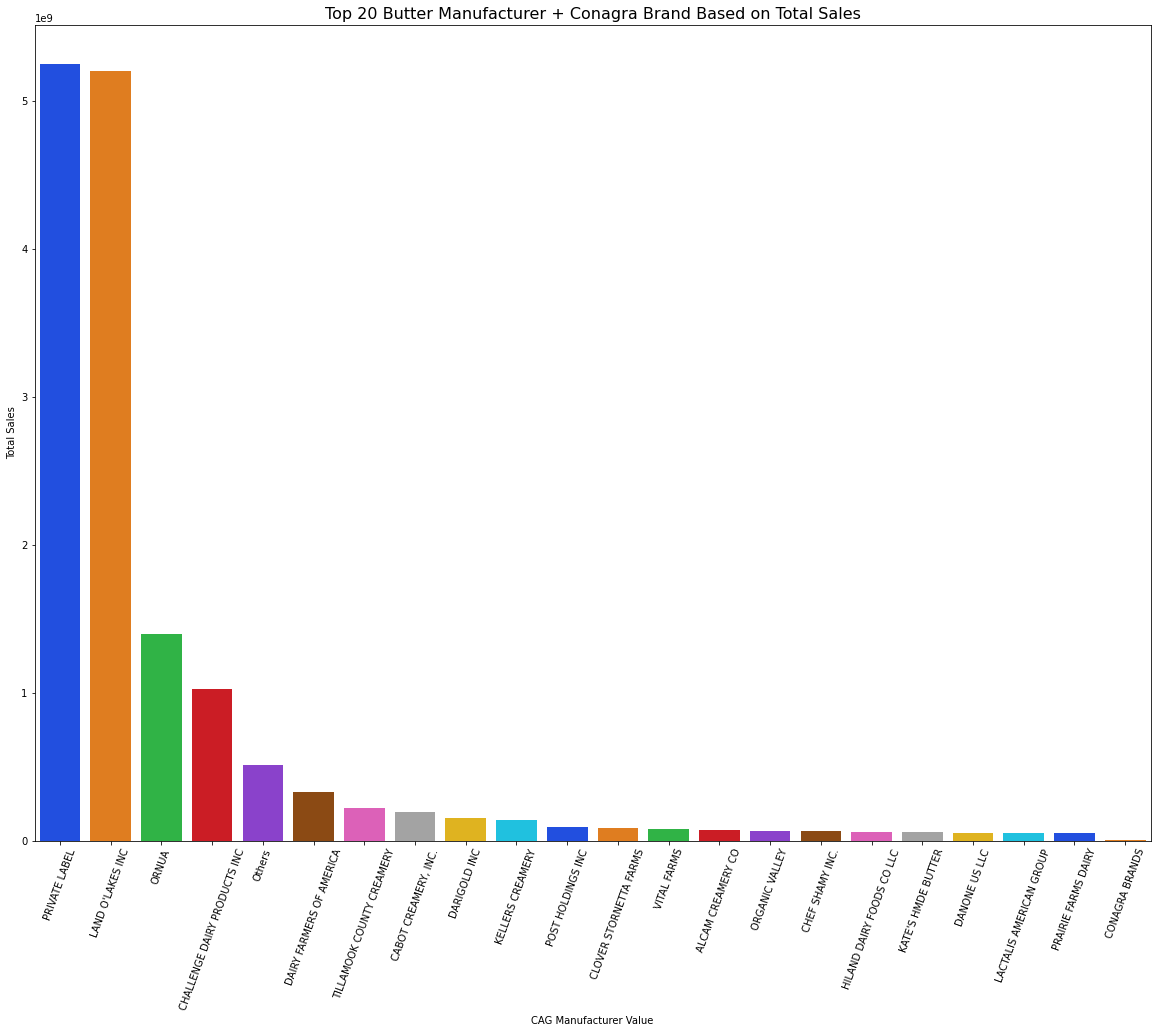

In [74]:
# Histogram for Top 20 Butter Brands and Congara Brand based on Total Sales
plt.figure(figsize = (20, 15))
sns.barplot(x= 'CAG Manufacturer Value', y = 'Total Sales', palette = 'bright', data = df_tablespreads_US_tot_sales_butter_by_man)
plt.xticks(rotation=70)
plt.xlabel('CAG Manufacturer Value')
plt.ylabel('Total Sales')
plt.title('Top 20 Butter Manufacturer + Conagra Brand Based on Total Sales', fontsize = 16)
plt.show()

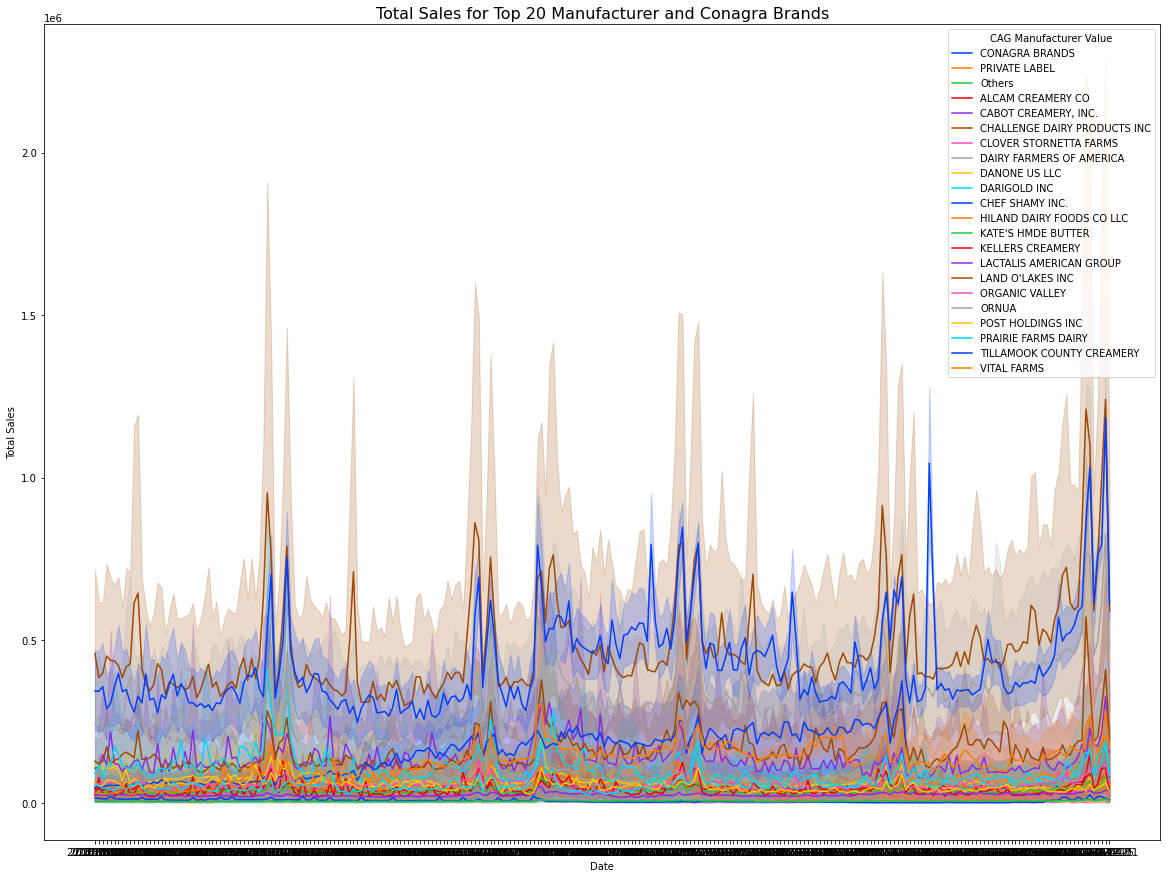

In [75]:
plt.figure(figsize = (20, 15))
sns.lineplot(x="Date", y = 'Total Sales', hue="CAG Manufacturer Value", palette = 'bright', data = df_tablespreads_US_butter)
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Total Sales for Top 20 Manufacturer and Conagra Brands', fontsize = 16)
plt.show()

### Check the Total Sales by Marjor Brand Value for Butter

In [87]:
df_tablespreads_US_tot_sales_butter_by_brand = df_tablespreads_US_butter.groupby('CAG Major Brand Value').agg({'Total Sales': 'sum'}).sort_values(by = ['Total Sales'], ascending = False).reset_index()
df_tablespreads_US_tot_sales_butter_by_brand

CAG Major Brand Value   Total Sales
0            PRIVATE LABEL  5.252428e+09
1             LAND O LAKES  5.206286e+09
2                KERRYGOLD  1.394390e+09
3         CHALLENGE BUTTER  9.444043e+08
4              BREAKSTONES  2.392552e+08
..                     ...           ...
316         BERKELEY FARMS  1.700331e+01
317  HERITAGE FAMILY FOODS  9.663790e+00
318              ALL BRAND  5.911045e+00
319             BROOKFIELD  1.590000e+00
320          LEHIGH VALLEY  1.596000e-01

[321 rows x 2 columns]

In [88]:
# Adjust the Dataframe about the Total sales by Brand
df_tablespreads_US_tot_sales_butter_by_brand['Rank'] = [i for i in range(1, 322)]
df_tablespreads_US_tot_sales_butter_by_brand.set_index("Rank", inplace = True)
df_tablespreads_US_tot_sales_butter_by_brand

CAG Major Brand Value   Total Sales
Rank                                     
1             PRIVATE LABEL  5.252428e+09
2              LAND O LAKES  5.206286e+09
3                 KERRYGOLD  1.394390e+09
4          CHALLENGE BUTTER  9.444043e+08
5               BREAKSTONES  2.392552e+08
...                     ...           ...
317          BERKELEY FARMS  1.700331e+01
318   HERITAGE FAMILY FOODS  9.663790e+00
319               ALL BRAND  5.911045e+00
320              BROOKFIELD  1.590000e+00
321           LEHIGH VALLEY  1.596000e-01

[321 rows x 2 columns]

In [89]:
# Check the Rank of Conagra Brand in Butter ("SMART BALANCE") and Make a Seperate Dataframe
df_tablespreads_US_tot_sales_butter_congara = df_tablespreads_US_tot_sales_butter_by_brand[df_tablespreads_US_tot_sales_butter_by_brand['CAG Major Brand Value'].apply(lambda x: x in ['SMART BALANCE', 'BLUE BONNET'])]
df_tablespreads_US_tot_sales_butter_congara

CAG Major Brand Value   Total Sales
Rank                                    
67           SMART BALANCE  2.839130e+06
147            BLUE BONNET  3.232041e+05

In [90]:
# Make a Seperate Dataframe for Top 20 Butter Brands
df_tablespreads_US_tot_sales_butter_by_brand_top20 = df_tablespreads_US_tot_sales_butter_by_brand[df_tablespreads_US_tot_sales_butter_by_brand.index <= 20]

In [93]:
# Merge the Two Dataframes of Top 20 Butter Brands and Congara Brand
df_tablespreads_US_tot_sales_butter_by_brand_top20_add_congara = pd.concat([df_tablespreads_US_tot_sales_butter_by_brand_top20, df_tablespreads_US_tot_sales_butter_congara], ignore_index=True)

In [94]:
# Get the Butter Top 20 + Conagra List based on Total Sales
df_tablespreads_US_tot_sales_butter_by_brand_top20_add_congara_list = list(df_tablespreads_US_tot_sales_butter_by_brand_top20_add_congara['CAG Major Brand Value'])
df_tablespreads_US_tot_sales_butter_by_brand_top20_add_congara_list

['PRIVATE LABEL',
 'LAND O LAKES',
 'KERRYGOLD',
 'CHALLENGE BUTTER',
 'BREAKSTONES',
 'TILLAMOOK',
 'CABOT',
 'DARIGOLD',
 'KELLERS',
 'CLOVER SONOMA',
 'CRYSTAL FARMS',
 'PLUGRA',
 'VITAL FARMS',
 'AMISH COUNTRY',
 'DANISH CREAMERY',
 'CHEF SHAMY',
 'ORGANIC VALLEY',
 'HILAND',
 'KATES',
 'HORIZON',
 'SMART BALANCE',
 'BLUE BONNET']

In [95]:
# Keep the Top 20 Butter + Conagra Brands and Set the Others as "Others"
df_tablespreads_US_butter['CAG Major Brand Value'] = df_tablespreads_US_butter['CAG Major Brand Value'].apply(lambda x: x if x in df_tablespreads_US_tot_sales_butter_by_brand_top20_add_congara_list else 'Others')

In [97]:
# Check the Total Sales by CAG Major Brand Value based on Generated New Brand Categories
df_tablespreads_US_tot_sales_butter_by_brand = df_tablespreads_US_butter.groupby('CAG Major Brand Value').agg({'Total Sales': 'sum'}).sort_values(by = ['Total Sales'], ascending = False).reset_index()
# Adjust the Dataframe about the Total sales by Brand
df_tablespreads_US_tot_sales_butter_by_brand['Rank'] = [i for i in range(1, 24)]
df_tablespreads_US_tot_sales_butter_by_brand.set_index("Rank", inplace = True)
df_tablespreads_US_tot_sales_butter_by_brand

CAG Major Brand Value   Total Sales
Rank                                    
1            PRIVATE LABEL  5.252428e+09
2             LAND O LAKES  5.206286e+09
3                KERRYGOLD  1.394390e+09
4         CHALLENGE BUTTER  9.444043e+08
5                   Others  6.828870e+08
6              BREAKSTONES  2.392552e+08
7                TILLAMOOK  2.210055e+08
8                    CABOT  1.942443e+08
9                 DARIGOLD  1.529157e+08
10                 KELLERS  8.991068e+07
11           CLOVER SONOMA  8.668024e+07
12           CRYSTAL FARMS  8.497748e+07
13                  PLUGRA  8.061276e+07
14             VITAL FARMS  7.707255e+07
15           AMISH COUNTRY  7.459778e+07
16         DANISH CREAMERY  7.301297e+07
17              CHEF SHAMY  6.683392e+07
18          ORGANIC VALLEY  6.677387e+07
19                  HILAND  5.940443e+07
20                   KATES  5.557986e+07
21                 HORIZON  5.232779e+07
22           SMART BALANCE  2.839130e+06
23             BLUE BONNET  3.232041e+05

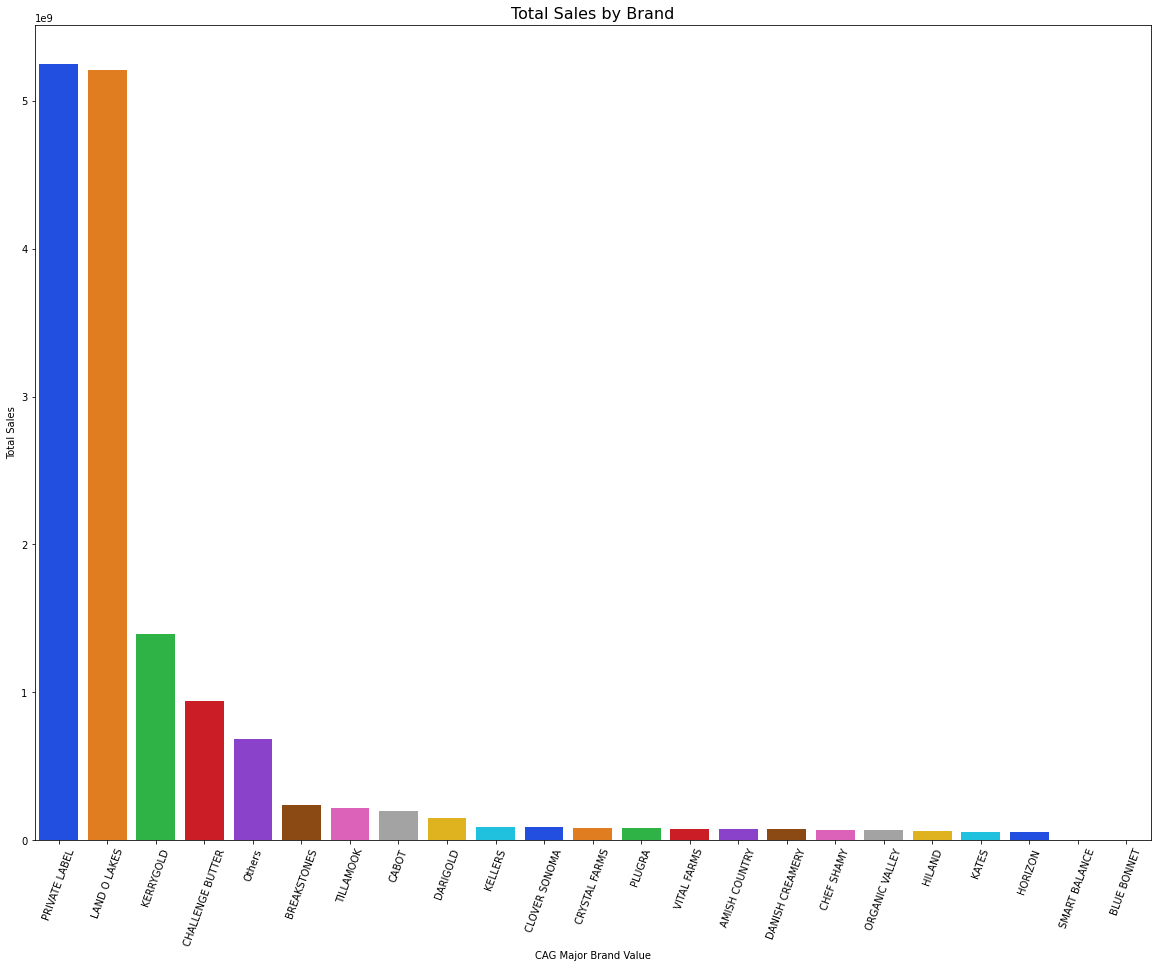

In [98]:
# Barplot for Total Sales by Brand
plt.figure(figsize = (20, 15))
sns.barplot(x= df_tablespreads_US_tot_sales_butter_by_brand['CAG Major Brand Value'], y = 'Total Sales', palette = 'bright', data = df_tablespreads_US_tot_sales_butter_by_brand)
plt.xticks(rotation=70)
plt.xlabel('CAG Major Brand Value')
plt.ylabel('Total Sales')
plt.title('Total Sales by Brand', fontsize = 16)
plt.show()

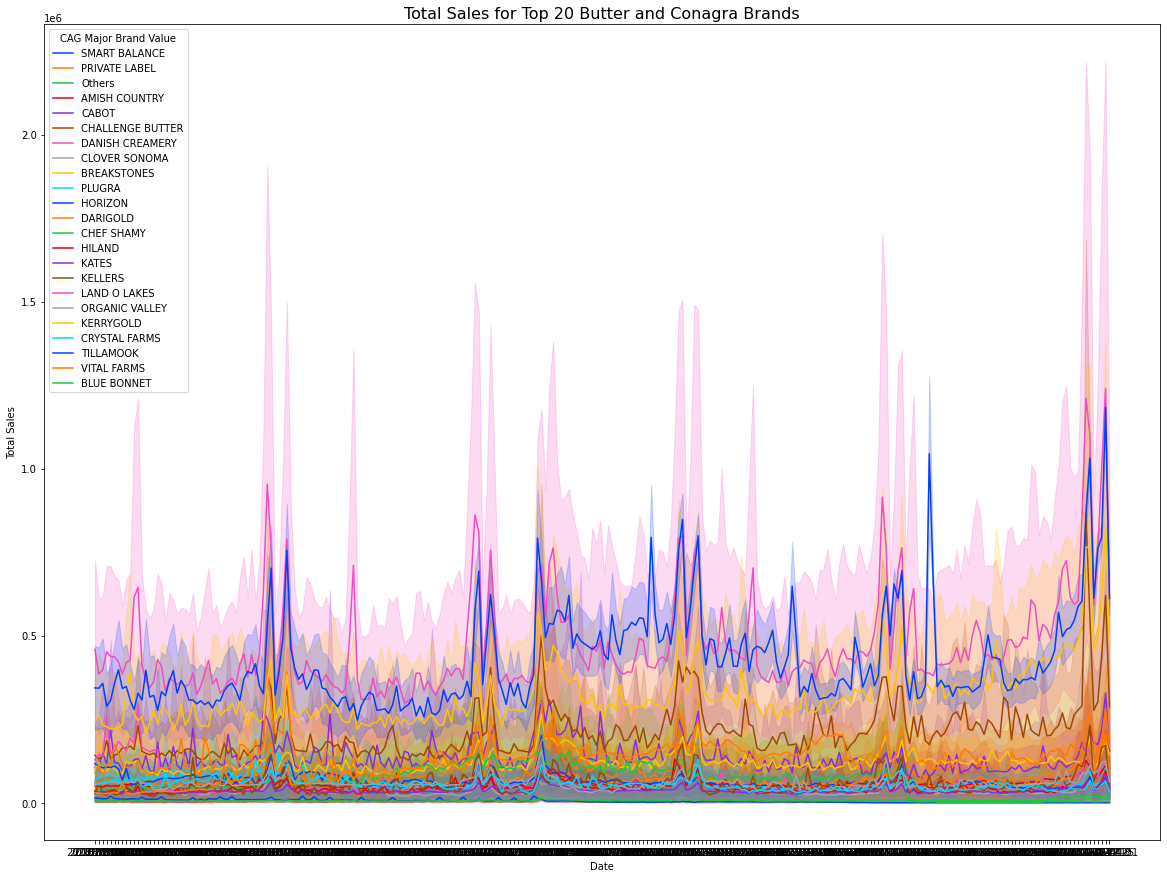

In [99]:
plt.figure(figsize = (20, 15))
sns.lineplot(x="Date", y = 'Total Sales', hue="CAG Major Brand Value", palette = 'bright', data = df_tablespreads_US_butter)
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Total Sales for Top 20 Butter and Conagra Brands', fontsize = 16)
plt.show()

# Margarine/Blends

## CAG Manufacturer Value for Margarine

In [100]:
# Count the Total Number of Margarine Brands For Each Manufacturer
df_tablespreads_US_mar_manufacturer_count = df_tablespreads_US_margarine.groupby('CAG Manufacturer Value')['CAG Major Brand Value'].nunique().sort_values(ascending = False).reset_index()
df_tablespreads_US_mar_manufacturer_count

CAG Manufacturer Value  CAG Major Brand Value
0                          UPFIELD                     12
1                   CONAGRA BRANDS                      8
2                VENTURA FOODS LLC                      6
3                      BUNGE FOODS                      3
4              WORLD CHEESE CO INC                      2
5          OLIVIO PREMIUM PRODUCTS                      2
6                    WILDBRINE LLC                      2
7                 AAK FOOD SERVICE                      1
8     PROSPERITY ORGANIC FOODS INC                      1
9                    S BERTRAM INC                      1
10                 ROKISKIO PIENAS                      1
11        RICHARDSON INTERNATIONAL                      1
12       PRIDA IMPORT & EXPORT LLC                      1
13                   PRIVATE LABEL                      1
14            SOMMER MAID CREAMERY                      1
15                          MONTYS                      1
16             MIYOKOS KITCHEN INC                      1
17           SAFFOLA QUALITY FOODS                      1
18             THE MANISCHEWITZ CO                      1
19               STRATAS FOODS LLC                      1
20                  SUPREME OIL CO                      1
21                 SWIFT & COMPANY                      1
22                    MERCASID S A                      1
23            THURSDAY COTTAGE LTD                      1
24                           TONYS                      1
25      TONYS ORIGINAL STEAKBUTTER                      1
26                     WAYFARE INC                      1
27                WILSEY FOODS INC                      1
28       ZEELAND FOOD SERVICES INC                      1
29                ZT KRUSZWICA S A                      1
30                MIYOKOS CREAMERY                      1
31             MEHADRIN DAIRY CORP                      1
32                B & G FOODS INC.                      1
33                MEDLEE FOODS LLC                      1
34        B&I OVERSEAS TRADING INC                      1
35              BERKELEY FARMS INC                      1
36           BUNGE POLSKA SP Z O O                      1
37               CALIFIA FARMS LLC                      1
38    CHALLENGE DAIRY PRODUCTS INC                      1
39        DAIRY FARMERS OF AMERICA                      1
40           DAIRY FRESH FOODS INC                      1
41                     DUTCH FARMS                      1
42          EAGLE DISTRIBUTORS INC                      1
43                  EDEN FOODS INC                      1
44                EPICUREAN BUTTER                      1
45             FORAGER PROJECT LLC                      1
46          FOUR SEASONS DAIRY INC                      1
47                  GOYA FOODS INC                      1
48       GREAT LAKES CHEESE CO INC                      1
49            HILLANDALE FARMS INC                      1
50                     J & J DAIRY                      1
51      J & J FARM CREAMERY., INC.                      1
52          JINDILLI BEVERAGES LLC                      1
53                KELLERS CREAMERY                      1
54                LAND O'LAKES INC                      1
55                 LARCHWOOD FARMS                      1
56  LEVER BROTHERS WEST INDIES LTD                      1
57               LYRICAL FOODS INC                      1
58                    MAGNOLIA INC                      1
59                   ZVIJEZDA D.D.                      1

In [101]:
# Count the Total Number of Margarine Brands For Congara Brands
df_tablespreads_US_mar_conagra = df_tablespreads_US_margarine[df_tablespreads_US_margarine['CAG Manufacturer Value'].apply(lambda x: x in ["CONAGRA BRANDS"])]
df_tablespreads_US_mar_conagra_brands_count = df_tablespreads_US_mar_conagra.groupby('CAG Manufacturer Value')['CAG Major Brand Value'].nunique().sort_values(ascending = False).reset_index()
df_tablespreads_US_mar_conagra_brands_count

CAG Manufacturer Value  CAG Major Brand Value
0         CONAGRA BRANDS                      8

In [102]:
df_tablespreads_US_mar_conagra['CAG Major Brand Value'].unique()

array(['BLUE BONNET', 'EARTH BALANCE', 'FLEISCHMANNS', 'MOVE OVER BUTTER',
       'NUCOA', 'PARKAY', 'SMART BALANCE', 'SMART BEAT'], dtype=object)

In [103]:
# Count the Total Number of Margarine Brands For Congara Brands
df_tablespreads_US_mar_conagra_products_count = df_tablespreads_US_margarine.groupby('CAG Manufacturer Value')['UPC 13 digit'].nunique().sort_values(ascending = False).reset_index()
df_tablespreads_US_mar_conagra_products_count

CAG Manufacturer Value  UPC 13 digit
0                    PRIVATE LABEL           252
1                          UPFIELD           103
2                   CONAGRA BRANDS            81
3                VENTURA FOODS LLC            19
4                      BUNGE FOODS            12
5                 LAND O'LAKES INC            12
6          OLIVIO PREMIUM PRODUCTS            11
7            DAIRY FRESH FOODS INC             6
8                      DUTCH FARMS             5
9     PROSPERITY ORGANIC FOODS INC             4
10             THE MANISCHEWITZ CO             4
11                    MAGNOLIA INC             3
12                ZT KRUSZWICA S A             3
13             MIYOKOS KITCHEN INC             3
14                  SUPREME OIL CO             2
15             MEHADRIN DAIRY CORP             2
16                MEDLEE FOODS LLC             2
17                B & G FOODS INC.             2
18                    MERCASID S A             2
19          JINDILLI BEVERAGES LLC             2
20                MIYOKOS CREAMERY             2
21                KELLERS CREAMERY             2
22           SAFFOLA QUALITY FOODS             2
23          EAGLE DISTRIBUTORS INC             2
24        B&I OVERSEAS TRADING INC             2
25                   WILDBRINE LLC             2
26                EPICUREAN BUTTER             2
27                WILSEY FOODS INC             2
28               CALIFIA FARMS LLC             2
29        DAIRY FARMERS OF AMERICA             2
30             WORLD CHEESE CO INC             2
31               STRATAS FOODS LLC             1
32       ZEELAND FOOD SERVICES INC             1
33            SOMMER MAID CREAMERY             1
34            THURSDAY COTTAGE LTD             1
35                   S BERTRAM INC             1
36                     WAYFARE INC             1
37                 SWIFT & COMPANY             1
38      TONYS ORIGINAL STEAKBUTTER             1
39                           TONYS             1
40                AAK FOOD SERVICE             1
41                 ROKISKIO PIENAS             1
42       GREAT LAKES CHEESE CO INC             1
43              BERKELEY FARMS INC             1
44           BUNGE POLSKA SP Z O O             1
45    CHALLENGE DAIRY PRODUCTS INC             1
46                  EDEN FOODS INC             1
47             FORAGER PROJECT LLC             1
48          FOUR SEASONS DAIRY INC             1
49                  GOYA FOODS INC             1
50            HILLANDALE FARMS INC             1
51        RICHARDSON INTERNATIONAL             1
52                     J & J DAIRY             1
53      J & J FARM CREAMERY., INC.             1
54                 LARCHWOOD FARMS             1
55  LEVER BROTHERS WEST INDIES LTD             1
56               LYRICAL FOODS INC             1
57                          MONTYS             1
58       PRIDA IMPORT & EXPORT LLC             1
59                   ZVIJEZDA D.D.             1

In [104]:
df_tablespreads_US_mar_conagra['CAG Major Brand Value'].unique()

array(['BLUE BONNET', 'EARTH BALANCE', 'FLEISCHMANNS', 'MOVE OVER BUTTER',
       'NUCOA', 'PARKAY', 'SMART BALANCE', 'SMART BEAT'], dtype=object)

## CAG Major Brand Value for Margarine

In [105]:
# Count the Total Number of Margarine Products For Each Brands
# Count the Total Number of Margarine Brands For Congara Brands
df_tablespreads_US_margarine.groupby('CAG Major Brand Value')['UPC 13 digit'].nunique().sort_values(ascending = False).reset_index()

CAG Major Brand Value  UPC 13 digit
0                   PRIVATE LABEL           252
1                   COUNTRY CROCK            44
2   I CANT BELIEVE ITS NOT BUTTER            29
3                   SMART BALANCE            23
4                   EARTH BALANCE            22
..                            ...           ...
81                         MAVESA             1
82                         MIGDAL             1
83                         MONTYS             1
84               MOVE OVER BUTTER             1
85                       ZVIJEZDA             1

[86 rows x 2 columns]

In [106]:
# Count the Total Number of Margarine Products For Congara Brands
# Count the Total Number of Margarine Brands For Congara Brands
df_tablespreads_US_mar_conagra_products_count_by_brand = df_tablespreads_US_mar_conagra.groupby('CAG Major Brand Value')['UPC 13 digit'].nunique().sort_values(ascending = False).reset_index()
df_tablespreads_US_mar_conagra_products_count_by_brand

CAG Major Brand Value  UPC 13 digit
0         SMART BALANCE            23
1         EARTH BALANCE            22
2           BLUE BONNET            16
3                PARKAY             9
4          FLEISCHMANNS             8
5      MOVE OVER BUTTER             1
6                 NUCOA             1
7            SMART BEAT             1

## CAG Form Value for Margarine

In [107]:
# Check the Unique Margarine CAG Forms
df_tablespreads_US_margarine['CAG Form Value'].unique()

array(['ALL OTHER FORM', 'STICKS', 'TUBS', 'SPRAY/SQUEEZE'], dtype=object)

In [108]:
# Count the Total Number of Margarine Products by CAG Form
df_tablespreads_US_margarine.groupby('CAG Form Value')['UPC 13 digit'].nunique().sort_values(ascending = False).reset_index()

CAG Form Value  UPC 13 digit
0            TUBS           392
1          STICKS           110
2  ALL OTHER FORM            67
3   SPRAY/SQUEEZE            12

## CAG Tier Value for Margarine

In [109]:
# Check the Unique Margarine CAG Tier Value
df_tablespreads_US_margarine['CAG Tier Value'].unique()

array(['VALUE', 'PREMIUM', 'MAINSTREAM', 'SUPER PREMIUM', 'TBD'],
      dtype=object)

In [110]:
# Count the Total Number of Margarine Products by CAG Tier Value
df_tablespreads_US_margarine.groupby('CAG Tier Value')['UPC 13 digit'].nunique().sort_values(ascending = False).reset_index()

CAG Tier Value  UPC 13 digit
0     MAINSTREAM           326
1          VALUE           115
2        PREMIUM            98
3  SUPER PREMIUM            39
4            TBD             3

## **Total Sales**

### **Total Sales by CAG Manufacturer Value for Margarine**

In [111]:
# Check the Total Sales by CAG Manufacturer Value
df_tablespreads_US_tol_sales_mar_by_manufacturer = df_tablespreads_US_margarine.groupby('CAG Manufacturer Value').agg({'Total Sales': 'sum'}).sort_values(by = ['Total Sales'], ascending = False).reset_index()

# Adjust the Dataframe about the Total Sales by Manufacturer
df_tablespreads_US_tol_sales_mar_by_manufacturer['Rank'] = [i for i in range(1, 61)]
df_tablespreads_US_tol_sales_mar_by_manufacturer.set_index("Rank", inplace = True)
df_tablespreads_US_tol_sales_mar_by_manufacturer

CAG Manufacturer Value   Total Sales
Rank                                              
1                            UPFIELD  4.366477e+09
2                     CONAGRA BRANDS  1.961112e+09
3                      PRIVATE LABEL  2.061940e+08
4                   LAND O'LAKES INC  1.542579e+08
5            OLIVIO PREMIUM PRODUCTS  6.819046e+07
6                  VENTURA FOODS LLC  4.173863e+07
7                MIYOKOS KITCHEN INC  3.066234e+07
8       PROSPERITY ORGANIC FOODS INC  1.476311e+07
9           RICHARDSON INTERNATIONAL  7.108996e+06
10                  MIYOKOS CREAMERY  6.126185e+06
11                       BUNGE FOODS  5.985733e+06
12                 LYRICAL FOODS INC  2.482987e+06
13             DAIRY FRESH FOODS INC  1.627141e+06
14          DAIRY FARMERS OF AMERICA  1.602145e+06
15                   ROKISKIO PIENAS  6.593871e+05
16                       DUTCH FARMS  6.584761e+05
17                 CALIFIA FARMS LLC  5.963771e+05
18               THE MANISCHEWITZ CO  5.328505e+05
19    LEVER BROTHERS WEST INDIES LTD  4.875136e+05
20         PRIDA IMPORT & EXPORT LLC  4.409053e+05
21                  KELLERS CREAMERY  3.834656e+05
22                 STRATAS FOODS LLC  3.426521e+05
23                  WILSEY FOODS INC  3.230964e+05
24            EAGLE DISTRIBUTORS INC  3.107073e+05
25               FORAGER PROJECT LLC  2.494909e+05
26               WORLD CHEESE CO INC  2.293527e+05
27                       WAYFARE INC  2.099212e+05
28                  B & G FOODS INC.  2.038488e+05
29              HILLANDALE FARMS INC  1.448905e+05
30            JINDILLI BEVERAGES LLC  1.414990e+05
31                    GOYA FOODS INC  1.229429e+05
32              SOMMER MAID CREAMERY  1.199749e+05
33        TONYS ORIGINAL STEAKBUTTER  1.036606e+05
34               MEHADRIN DAIRY CORP  8.563241e+04
35                       J & J DAIRY  6.495887e+04
36                  MEDLEE FOODS LLC  6.237642e+04
37                  ZT KRUSZWICA S A  5.909681e+04
38                     S BERTRAM INC  5.806896e+04
39             SAFFOLA QUALITY FOODS  5.647548e+04
40                    EDEN FOODS INC  5.551630e+04
41                     ZVIJEZDA D.D.  5.370679e+04
42        J & J FARM CREAMERY., INC.  5.359904e+04
43                    SUPREME OIL CO  5.174419e+04
44         GREAT LAKES CHEESE CO INC  4.851337e+04
45      CHALLENGE DAIRY PRODUCTS INC  4.847610e+04
46                             TONYS  3.446182e+04
47                     WILDBRINE LLC  3.349932e+04
48                  AAK FOOD SERVICE  2.527565e+04
49                   LARCHWOOD FARMS  1.898350e+04
50             BUNGE POLSKA SP Z O O  1.504471e+04
51            FOUR SEASONS DAIRY INC  1.489616e+04
52                      MERCASID S A  1.246542e+04
53                      MAGNOLIA INC  1.179404e+04
54                  EPICUREAN BUTTER  6.755508e+03
55         ZEELAND FOOD SERVICES INC  5.569370e+03
56              THURSDAY COTTAGE LTD  3.051658e+03
57                            MONTYS  2.828312e+03
58          B&I OVERSEAS TRADING INC  7.289060e+02
59                BERKELEY FARMS INC  5.859193e+00
60                   SWIFT & COMPANY  1.660000e+00

In [112]:
# Check the Rank of Conagra Brand in Margarine and Make a Seperate Dataframe
df_tablespreads_US_tot_sales_mar_congara_manu = df_tablespreads_US_tol_sales_mar_by_manufacturer[df_tablespreads_US_tol_sales_mar_by_manufacturer['CAG Manufacturer Value'] == 'CONAGRA BRANDS']
df_tablespreads_US_tot_sales_mar_congara_manu

CAG Manufacturer Value   Total Sales
Rank                                     
2            CONAGRA BRANDS  1.961112e+09

In [113]:
# Make a Seperate Dataframe for Top 5 Margarine Manufacturer
df_tablespreads_US_tol_sales_mar_by_manufacturer_top5 = df_tablespreads_US_tol_sales_mar_by_manufacturer[df_tablespreads_US_tol_sales_mar_by_manufacturer.index <= 5]

In [114]:
# Get the Butter Top 5 Manufacturer List based on Total Sales
df_tablespreads_US_tot_sales_mar_by_manufacturer_top5_list = list(df_tablespreads_US_tol_sales_mar_by_manufacturer_top5['CAG Manufacturer Value'])
df_tablespreads_US_tot_sales_mar_by_manufacturer_top5_list

['UPFIELD',
 'CONAGRA BRANDS',
 'PRIVATE LABEL',
 "LAND O'LAKES INC",
 'OLIVIO PREMIUM PRODUCTS']

In [117]:
# Keep the Top 5 Margarine and Set the Others as "Others"
df_tablespreads_US_margarine['CAG Manufacturer Value'] = df_tablespreads_US_margarine['CAG Manufacturer Value'].apply(lambda x: x if x in df_tablespreads_US_tot_sales_mar_by_manufacturer_top5_list else 'Others')

# Check the Total Sales by CAG Manufacturer Value based on Generated New Brand Categories
df_tablespreads_US_tol_sales_mar_by_manufacturer = df_tablespreads_US_margarine.groupby('CAG Manufacturer Value').agg({'Total Sales': 'sum'}).sort_values(by = ['Total Sales'], ascending = False).reset_index()
# Adjust the Dataframe about the Total sales by Brand
df_tablespreads_US_tol_sales_mar_by_manufacturer['Rank'] = [i for i in range(1, 7)]
df_tablespreads_US_tol_sales_mar_by_manufacturer.set_index("Rank", inplace = True)
df_tablespreads_US_tol_sales_mar_by_manufacturer

CAG Manufacturer Value   Total Sales
Rank                                       
1                     UPFIELD  4.366477e+09
2              CONAGRA BRANDS  1.961112e+09
3               PRIVATE LABEL  2.061940e+08
4            LAND O'LAKES INC  1.542579e+08
5                      Others  1.192418e+08
6     OLIVIO PREMIUM PRODUCTS  6.819046e+07

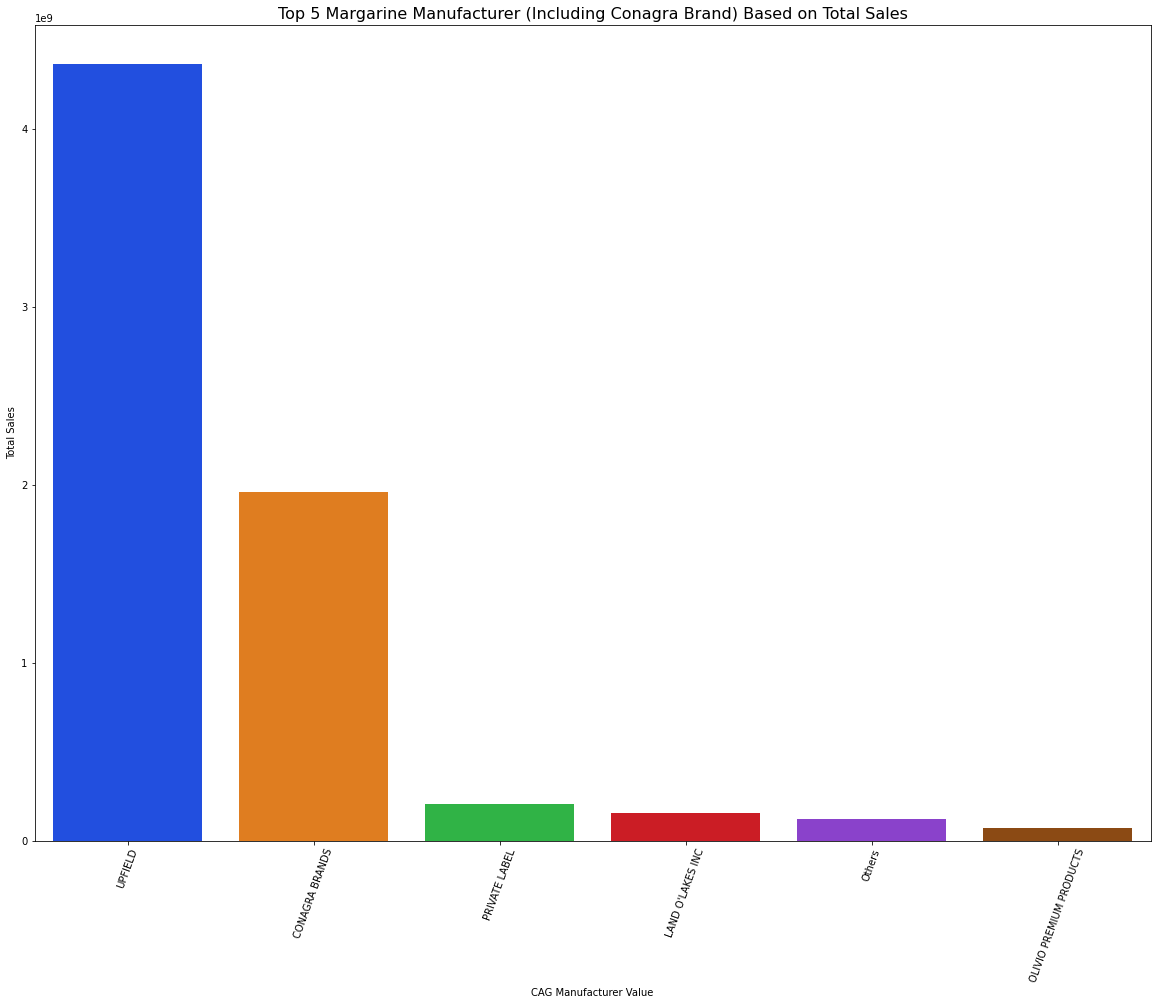

In [118]:
# Histogram for Top 5 Margarine Manufacturer based on Total Sales
plt.figure(figsize = (20, 15))
sns.barplot(x= 'CAG Manufacturer Value', y = 'Total Sales', palette = 'bright', data = df_tablespreads_US_tol_sales_mar_by_manufacturer)
plt.xticks(rotation=70)
plt.xlabel('CAG Manufacturer Value')
plt.ylabel('Total Sales')
plt.title('Top 5 Margarine Manufacturer (Including Conagra Brand) Based on Total Sales', fontsize = 16)
plt.show()

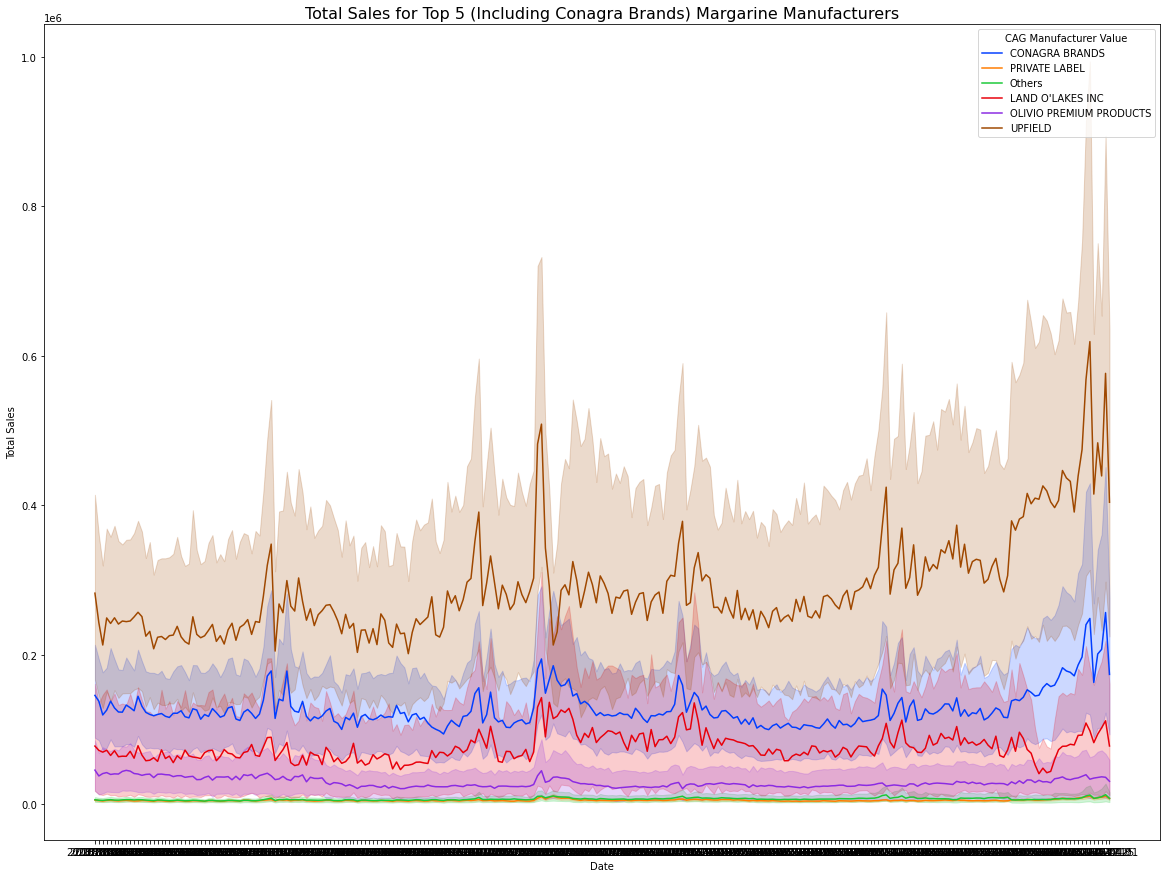

In [119]:
plt.figure(figsize = (20, 15))
sns.lineplot(x="Date", y = 'Total Sales', hue="CAG Manufacturer Value", palette = 'bright', data = df_tablespreads_US_margarine)
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Total Sales for Top 5 (Including Conagra Brands) Margarine Manufacturers', fontsize = 16)
plt.show()

### **Check the Total Sales by Marjor Brand Value for Margarine**

In [120]:
# Check the Total Sales by CAG Major Brand Value
df_tablespreads_US_tot_sales_mar_by_brand = df_tablespreads_US_margarine.groupby('CAG Major Brand Value').agg({'Total Sales': 'sum'}).sort_values(by = ['Total Sales'], ascending = False).reset_index()

# Adjust the Dataframe about the Total Sales by Brand
df_tablespreads_US_tot_sales_mar_by_brand['Rank'] = [i for i in range(1, 87)]
df_tablespreads_US_tot_sales_mar_by_brand.set_index("Rank", inplace = True)
df_tablespreads_US_tot_sales_mar_by_brand

CAG Major Brand Value   Total Sales
Rank                                             
1                     COUNTRY CROCK  2.232098e+09
2     I CANT BELIEVE ITS NOT BUTTER  1.372575e+09
3                       BLUE BONNET  7.569754e+08
4                          IMPERIAL  5.773503e+08
5                     SMART BALANCE  5.354175e+08
...                             ...           ...
82                        MLEKOVITA  7.289060e+02
83                       SMART BEAT  4.743000e+02
84                      FIRST PRIZE  1.870500e+02
85                   BERKELEY FARMS  5.859193e+00
86                       BROOKFIELD  1.660000e+00

[86 rows x 2 columns]

In [121]:
# Check the Rank of Conagra Brand in Margarine and Make a Seperate Dataframe
df_tablespreads_US_tot_sales_mar_congara = df_tablespreads_US_tot_sales_mar_by_brand[df_tablespreads_US_tot_sales_mar_by_brand['CAG Major Brand Value'].apply(lambda x: x in ['BLUE BONNET', 'EARTH BALANCE', 'FLEISCHMANNS', 'MOVE OVER BUTTER',
       'NUCOA', 'PARKAY', 'SMART BALANCE', 'SMART BEAT'])]
df_tablespreads_US_tot_sales_mar_congara

CAG Major Brand Value   Total Sales
Rank                                    
3              BLUE BONNET  7.569754e+08
5            SMART BALANCE  5.354175e+08
6            EARTH BALANCE  3.570437e+08
7                   PARKAY  2.501695e+08
12            FLEISCHMANNS  3.738532e+07
17        MOVE OVER BUTTER  2.254095e+07
29                   NUCOA  1.578952e+06
83              SMART BEAT  4.743000e+02

In [122]:
# Make a Seperate Dataframe for Top 20 Margarine Brands
df_tablespreads_US_tot_sales_mar_by_brand_top20 = df_tablespreads_US_tot_sales_mar_by_brand[df_tablespreads_US_tot_sales_mar_by_brand.index <= 20]

In [123]:
# Get the Margarine Top 20 List based on Total Sales
df_tablespreads_US_tot_sales_mar_by_brand_top20_list = list(df_tablespreads_US_tot_sales_mar_by_brand_top20['CAG Major Brand Value'])
df_tablespreads_US_tot_sales_mar_by_brand_top20_list

['COUNTRY CROCK',
 'I CANT BELIEVE ITS NOT BUTTER',
 'BLUE BONNET',
 'IMPERIAL',
 'SMART BALANCE',
 'EARTH BALANCE',
 'PARKAY',
 'PRIVATE LABEL',
 'LAND O LAKES',
 'BRUMMEL & BROWN',
 'OLIVIO',
 'FLEISCHMANNS',
 'MIYOKOS CREAMERY',
 'GOLD N SOFT',
 'BENECOL',
 'PURE BLENDS',
 'MOVE OVER BUTTER',
 'PROMISE',
 'MELT',
 'CANOLA HARVEST']

In [124]:
# Keep the Top 20 Margarine Brands and Set the Others as "Others"
df_tablespreads_US_margarine['CAG Major Brand Value'] = df_tablespreads_US_margarine['CAG Major Brand Value'].apply(lambda x: x if x in df_tablespreads_US_tot_sales_mar_by_brand_top20_list else 'Others')

# Check the Total Sales by CAG Major Brand Value based on Generated New Brand Categories
df_tablespreads_US_tol_sales_mar_by_brand = df_tablespreads_US_margarine.groupby('CAG Major Brand Value').agg({'Total Sales': 'sum'}).sort_values(by = ['Total Sales'], ascending = False).reset_index()
# Adjust the Dataframe about the Total sales by Brand
df_tablespreads_US_tol_sales_mar_by_brand['Rank'] = [i for i in range(1, 22)]
df_tablespreads_US_tol_sales_mar_by_brand.set_index("Rank", inplace = True)
df_tablespreads_US_tol_sales_mar_by_brand

CAG Major Brand Value   Total Sales
Rank                                             
1                     COUNTRY CROCK  2.232098e+09
2     I CANT BELIEVE ITS NOT BUTTER  1.372575e+09
3                       BLUE BONNET  7.569754e+08
4                          IMPERIAL  5.773503e+08
5                     SMART BALANCE  5.354175e+08
6                     EARTH BALANCE  3.570437e+08
7                            PARKAY  2.501695e+08
8                     PRIVATE LABEL  2.061940e+08
9                      LAND O LAKES  1.542579e+08
10                  BRUMMEL & BROWN  1.399834e+08
11                           OLIVIO  4.293730e+07
12                     FLEISCHMANNS  3.738532e+07
13                 MIYOKOS CREAMERY  3.678852e+07
14                           Others  3.386031e+07
15                      GOLD N SOFT  3.126930e+07
16                          BENECOL  2.525316e+07
17                      PURE BLENDS  2.324480e+07
18                 MOVE OVER BUTTER  2.254095e+07
19                          PROMISE  1.825706e+07
20                             MELT  1.476311e+07
21                   CANOLA HARVEST  7.108996e+06

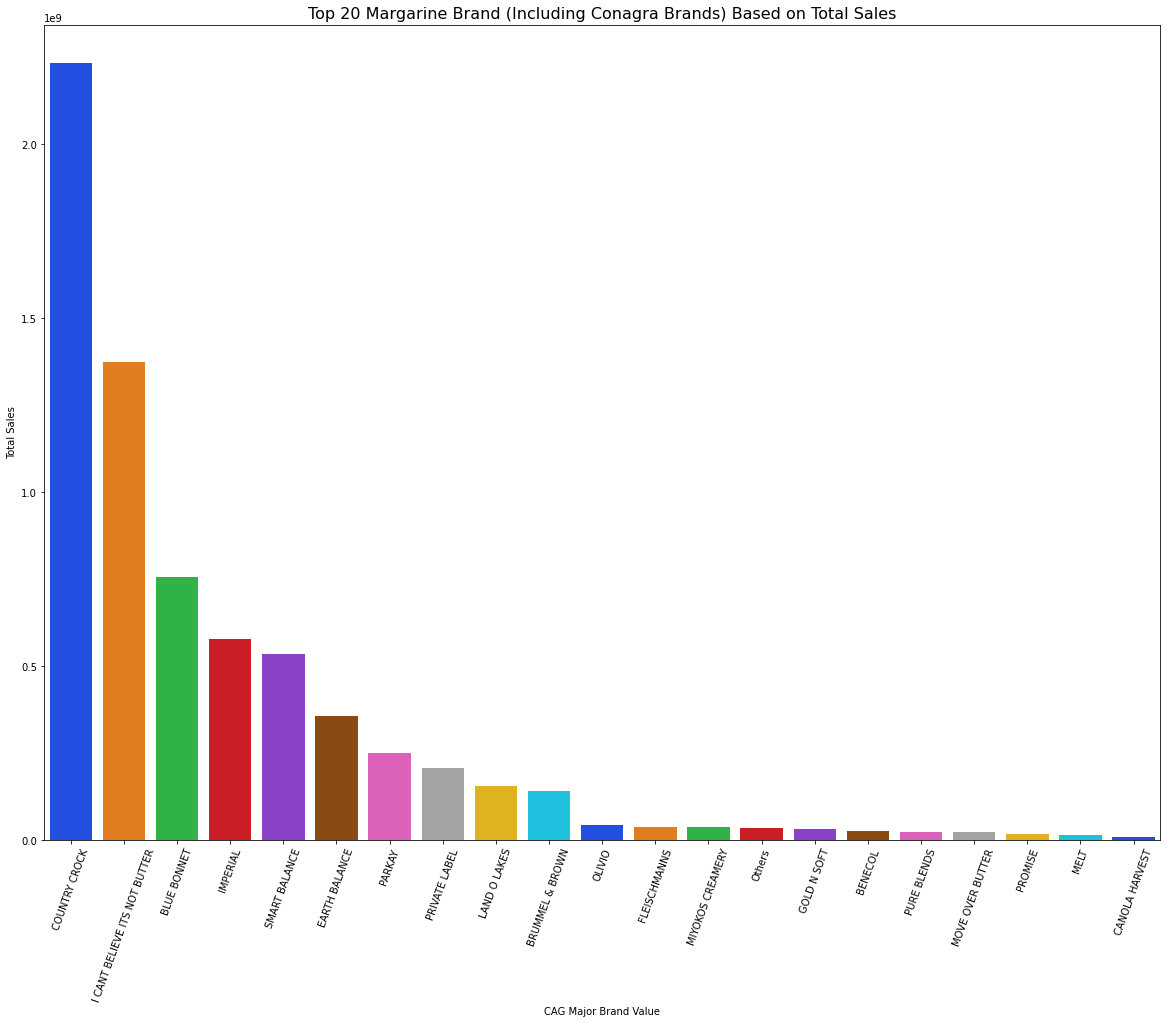

In [125]:
# Histogram for Top 20 Margarine Brands based on Total Sales
plt.figure(figsize = (20, 15))
sns.barplot(x= 'CAG Major Brand Value', y = 'Total Sales', palette = 'bright', data = df_tablespreads_US_tol_sales_mar_by_brand)
plt.xticks(rotation=70)
plt.xlabel('CAG Major Brand Value')
plt.ylabel('Total Sales')
plt.title('Top 20 Margarine Brand (Including Conagra Brands) Based on Total Sales', fontsize = 16)
plt.show()

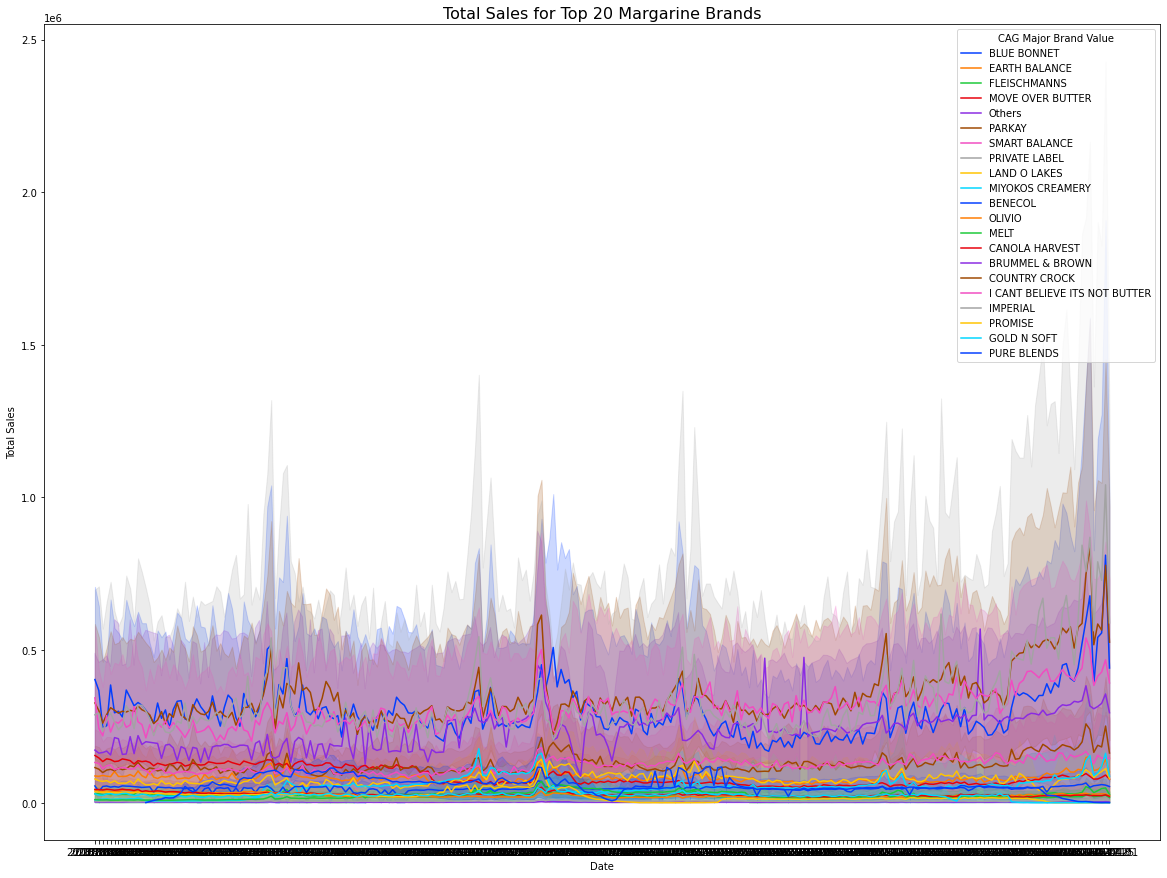

In [126]:
plt.figure(figsize = (20, 15))
sns.lineplot(x="Date", y = 'Total Sales', hue="CAG Major Brand Value", palette = 'bright', data = df_tablespreads_US_margarine)
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Total Sales for Top 20 Margarine Brands', fontsize = 16)
plt.show()

# Cooking Oil

In [127]:
df_oil = pd.read_csv('df_oil.csv')
df_oil_US = pd.read_csv('df_oil_US.csv')

In [128]:
df_oil_US_tot_sales_by_cat = df_oil_US.groupby('Category')['Total Sales'].agg(['sum','count']).reset_index()
df_oil_US_tot_sales_by_cat

Category           sum  count
0  COOKING & SALAD OILS  1.053205e+10  95018

## Check the Total Sales by CAG Manufacturer Value for Cooking Oil

In [129]:
# Check the Total Sales by CAG Manufacturer Value
df_oil_US_tol_sales_by_manufacturer = df_oil_US.groupby('Manufacturer').agg({'Total Sales': 'sum'}).sort_values(by = ['Total Sales'], ascending = False).reset_index()
df_oil_US_tol_sales_by_manufacturer

Manufacturer   Total Sales
0                    PRIVATE LABEL  5.160951e+09
1                      ACH FOOD CO  1.164701e+09
2                    B&G FOODS INC  1.103487e+09
3                  RICHARDSON INTL  1.020188e+09
4                VENTURA FOODS LLC  4.487468e+08
..                             ...           ...
465           AMERICAN POP CORN CO  2.840943e+01
466                  AXIOM ENT LLC  2.697000e+01
467  ARCHER DANIELS MIDLAND CO ADM  2.550021e+01
468             ANTOINE & MUSE LTD  2.290000e+01
469                  SIROB IMP INC  2.276172e+01

[470 rows x 2 columns]

In [130]:
# Adjust the Dataframe about the Total Sales by Manufacturer
df_oil_US_tol_sales_by_manufacturer['Rank'] = [i for i in range(1, 471)]
df_oil_US_tol_sales_by_manufacturer.set_index("Rank", inplace = True)
df_oil_US_tol_sales_by_manufacturer

Manufacturer   Total Sales
Rank                                             
1                     PRIVATE LABEL  5.160951e+09
2                       ACH FOOD CO  1.164701e+09
3                     B&G FOODS INC  1.103487e+09
4                   RICHARDSON INTL  1.020188e+09
5                 VENTURA FOODS LLC  4.487468e+08
...                             ...           ...
466            AMERICAN POP CORN CO  2.840943e+01
467                   AXIOM ENT LLC  2.697000e+01
468   ARCHER DANIELS MIDLAND CO ADM  2.550021e+01
469              ANTOINE & MUSE LTD  2.290000e+01
470                   SIROB IMP INC  2.276172e+01

[470 rows x 2 columns]

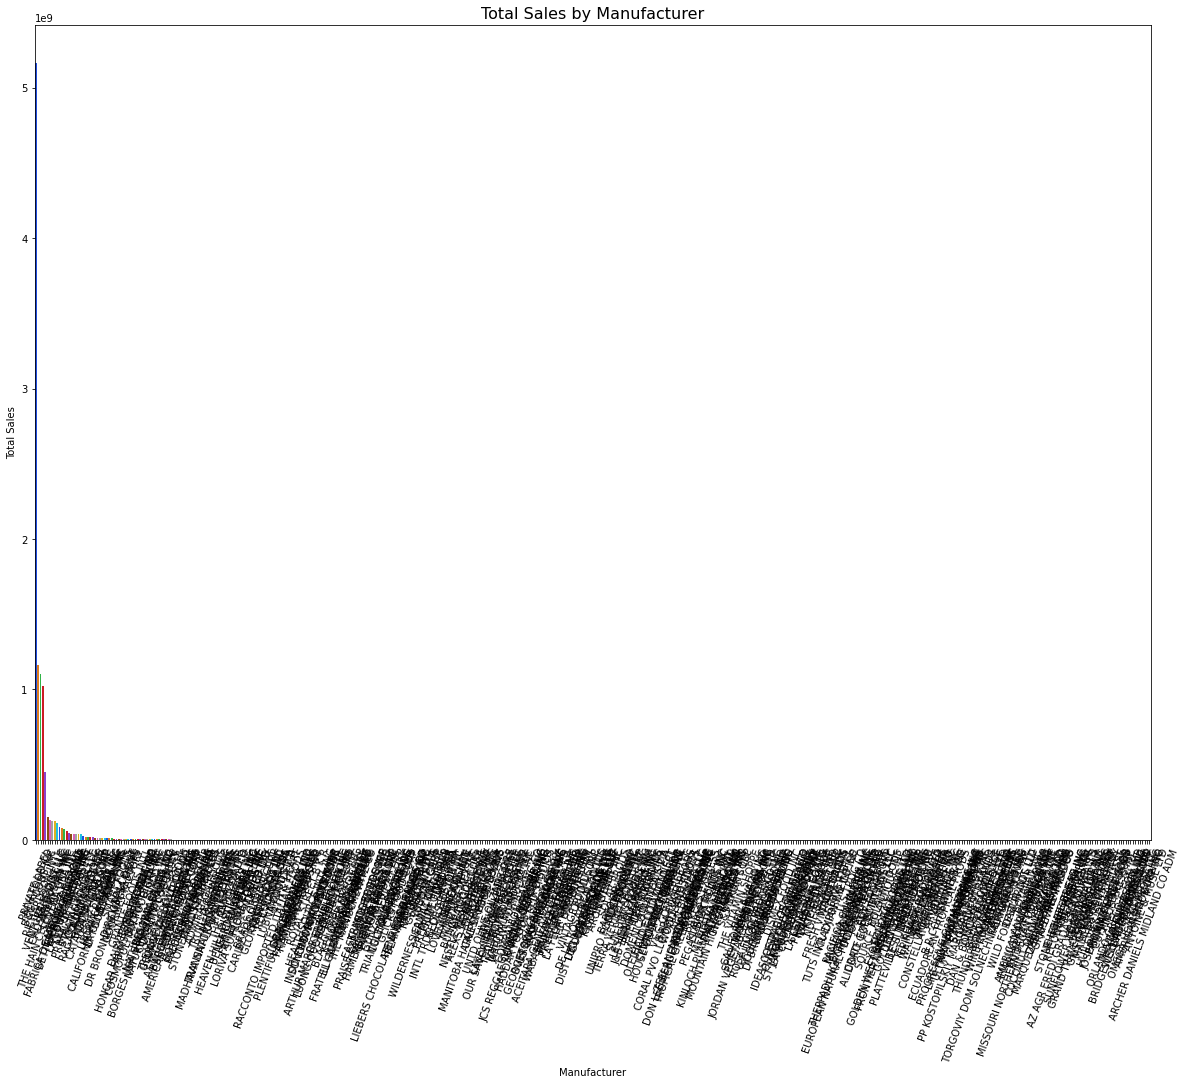

In [131]:
# Barplot for Total Sales by Manufacturer
plt.figure(figsize = (20, 15))
sns.barplot(x= df_oil_US_tol_sales_by_manufacturer['Manufacturer'], y = 'Total Sales', palette = 'bright', data = df_oil_US_tol_sales_by_manufacturer)
plt.xticks(rotation=70)
plt.xlabel('Manufacturer')
plt.ylabel('Total Sales')
plt.title('Total Sales by Manufacturer', fontsize = 16)
plt.show()

In [132]:
# Check the Rank of Conagra Brand and Make a Seperate Dataframe
df_oil_US_tol_sales_congara_manu = df_oil_US_tol_sales_by_manufacturer[df_oil_US_tol_sales_by_manufacturer['Manufacturer'] == 'CONAGRA BRANDS']
df_oil_US_tol_sales_congara_manu

Manufacturer   Total Sales
Rank                              
16    CONAGRA BRANDS  4.238320e+07

In [133]:
# Make a Seperate Dataframe for Top 20 Cooking Oil Manufacturer
df_oil_US_tol_sales_by_manufacturer_top20 = df_oil_US_tol_sales_by_manufacturer[df_oil_US_tol_sales_by_manufacturer.index <= 20]

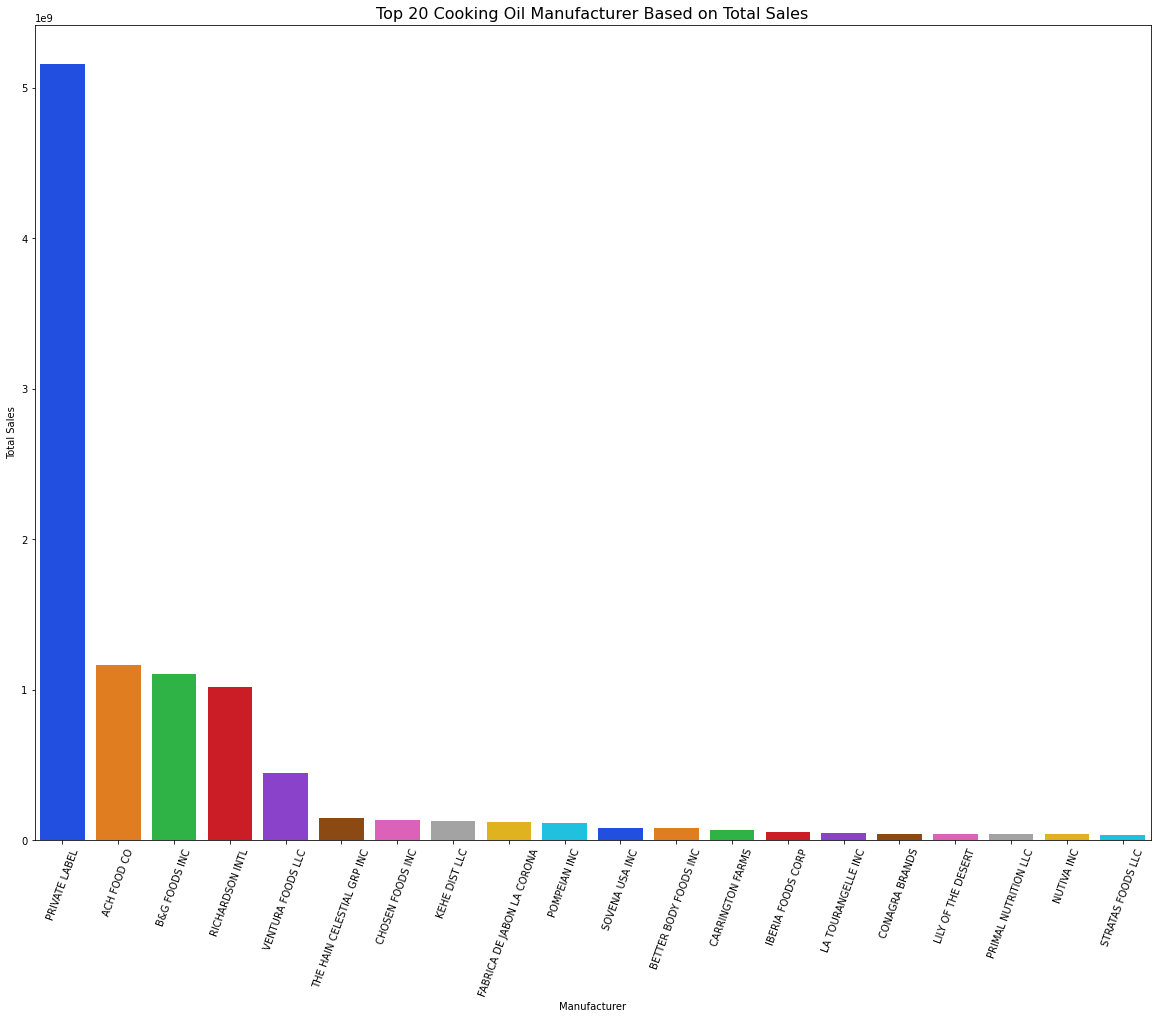

In [134]:
# Histogram for Top 20 Butter Manufacturer and Congara Brand based on Total Sales
plt.figure(figsize = (20, 15))
sns.barplot(x= 'Manufacturer', y = 'Total Sales', palette = 'bright', data = df_oil_US_tol_sales_by_manufacturer_top20)
plt.xticks(rotation=70)
plt.xlabel('Manufacturer')
plt.ylabel('Total Sales')
plt.title('Top 20 Cooking Oil Manufacturer Based on Total Sales', fontsize = 16)
plt.show()

In [135]:
# Get the Cooking Oil Top 20 + Conagra Brands Manufacturer List based on Total Sales
df_oil_US_tol_sales_by_manufacturer_top20_list = list(df_oil_US_tol_sales_by_manufacturer_top20['Manufacturer'])
df_oil_US_tol_sales_by_manufacturer_top20_list

['PRIVATE LABEL',
 'ACH FOOD CO',
 'B&G FOODS INC',
 'RICHARDSON INTL',
 'VENTURA FOODS LLC',
 'THE HAIN CELESTIAL GRP INC',
 'CHOSEN FOODS INC',
 'KEHE DIST LLC',
 'FABRICA DE JABON LA CORONA',
 'POMPEIAN INC',
 'SOVENA USA INC',
 'BETTER BODY FOODS INC',
 'CARRINGTON FARMS',
 'IBERIA FOODS CORP',
 'LA TOURANGELLE INC',
 'CONAGRA BRANDS',
 'LILY OF THE DESERT',
 'PRIMAL NUTRITION LLC',
 'NUTIVA INC',
 'STRATAS FOODS LLC']

In [136]:
# Make a Seperate Dataframe for Top 20 + Conagra Cooling Oil Manufacturer based on df_tablespreads_US_butter
df_oil_US_tol_sales_by_manufacturer_top20_man_TS = df_oil_US[df_oil_US['Manufacturer'].apply(lambda x: x in df_oil_US_tol_sales_by_manufacturer_top20_list)]

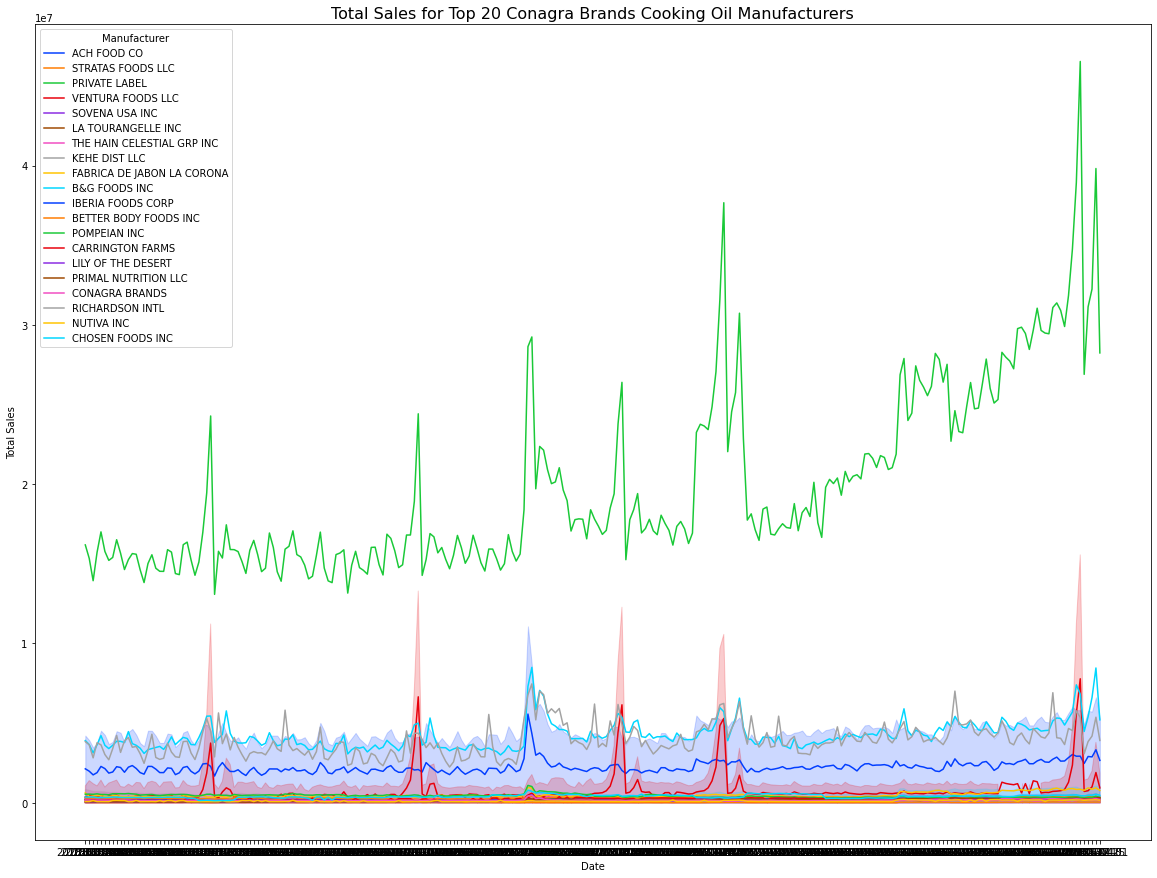

In [137]:
plt.figure(figsize = (20, 15))
sns.lineplot(x="Date", y = 'Total Sales', hue="Manufacturer", palette = 'bright', data = df_oil_US_tol_sales_by_manufacturer_top20_man_TS)
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Total Sales for Top 20 Conagra Brands Cooking Oil Manufacturers', fontsize = 16)
plt.show()

## Check the Total Sales by Marjor Brand Value for Cooking Oil

In [138]:
df_oil_US_tot_sales_by_brand = df_oil_US.groupby('Brand').agg({'Total Sales': 'sum'}).sort_values(by = ['Total Sales'], ascending = False).reset_index()
df_oil_US_tot_sales_by_brand

Brand   Total Sales
0     PRIVATE LABEL COOKING & SALAD OILS  5.160951e+09
1            MAZOLA COOKING & SALAD OILS  1.157040e+09
2            CRISCO COOKING & SALAD OILS  1.103487e+09
3            WESSON COOKING & SALAD OILS  1.020188e+09
4           LOU ANA COOKING & SALAD OILS  4.445184e+08
..                                   ...           ...
522      JOLLY TIME COOKING & SALAD OILS  2.840943e+01
523         OMAGGIO COOKING & SALAD OILS  2.697000e+01
524           ENOVA COOKING & SALAD OILS  2.550021e+01
525  ANTOINE & MUSE COOKING & SALAD OILS  2.290000e+01
526         ABRUZZO COOKING & SALAD OILS  2.276172e+01

[527 rows x 2 columns]

In [139]:
# Adjust the Dataframe about the Total sales by Brand
df_oil_US_tot_sales_by_brand['Rank'] = [i for i in range(1, 528)]
df_oil_US_tot_sales_by_brand.set_index("Rank", inplace = True)
df_oil_US_tot_sales_by_brand

Brand   Total Sales
Rank                                                   
1      PRIVATE LABEL COOKING & SALAD OILS  5.160951e+09
2             MAZOLA COOKING & SALAD OILS  1.157040e+09
3             CRISCO COOKING & SALAD OILS  1.103487e+09
4             WESSON COOKING & SALAD OILS  1.020188e+09
5            LOU ANA COOKING & SALAD OILS  4.445184e+08
...                                   ...           ...
523       JOLLY TIME COOKING & SALAD OILS  2.840943e+01
524          OMAGGIO COOKING & SALAD OILS  2.697000e+01
525            ENOVA COOKING & SALAD OILS  2.550021e+01
526   ANTOINE & MUSE COOKING & SALAD OILS  2.290000e+01
527          ABRUZZO COOKING & SALAD OILS  2.276172e+01

[527 rows x 2 columns]

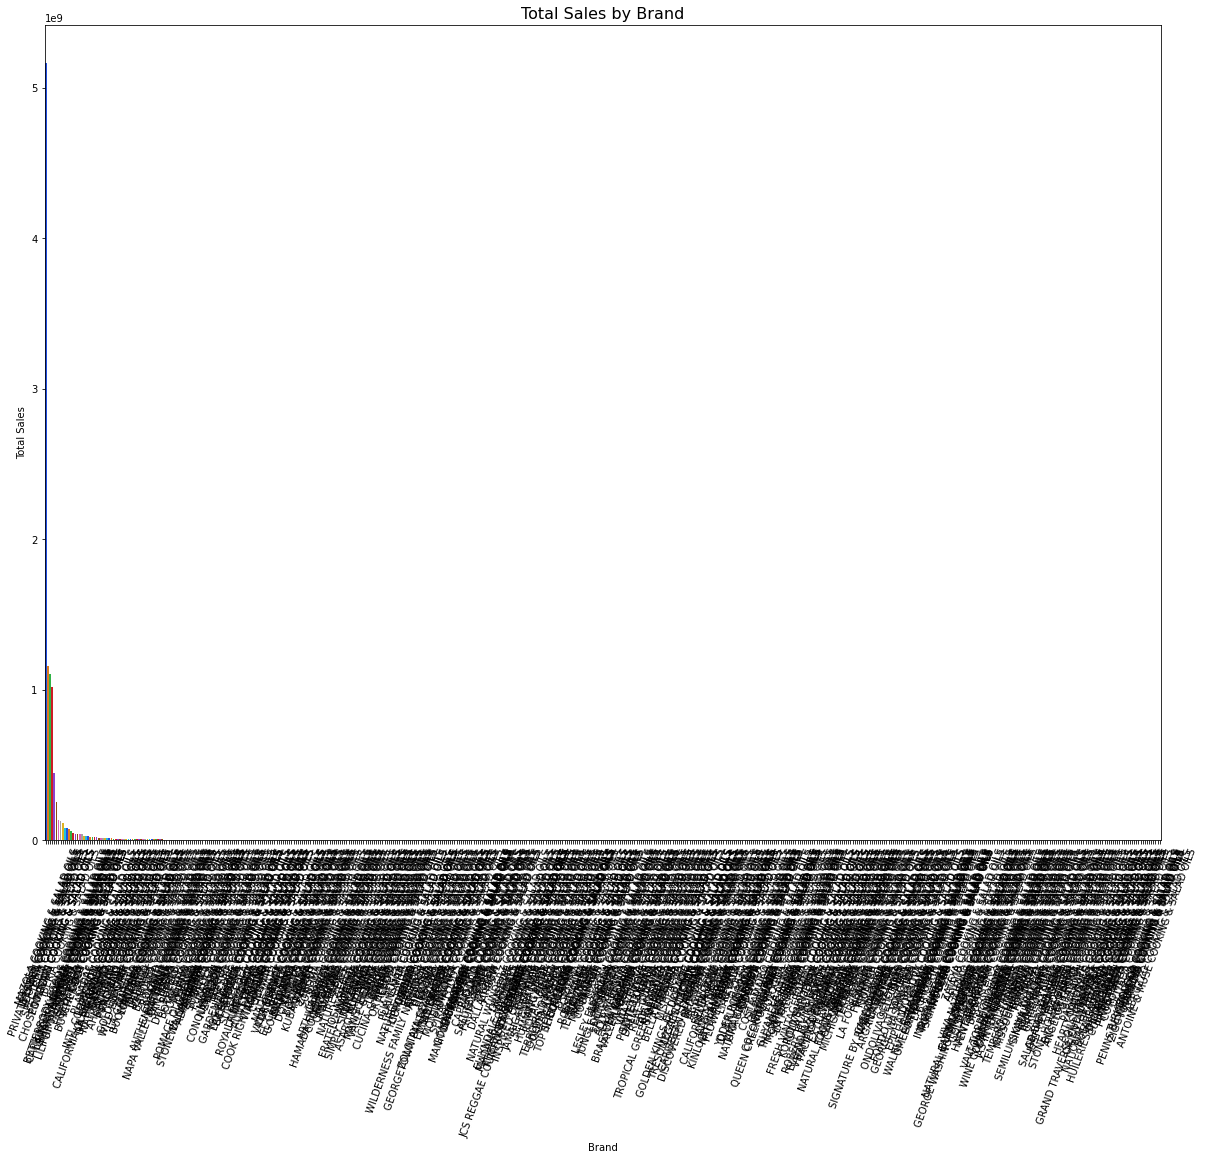

In [140]:
# Barplot for Total Sales by Brand
plt.figure(figsize = (20, 15))
sns.barplot(x= df_oil_US_tot_sales_by_brand['Brand'], y = 'Total Sales', palette = 'bright', data = df_oil_US_tot_sales_by_brand)
plt.xticks(rotation=70)
plt.xlabel('Brand')
plt.ylabel('Total Sales')
plt.title('Total Sales by Brand', fontsize = 16)
plt.show()

In [141]:
# Check the Rank of Conagra Brand and Make a Seperate Dataframe
df_oil_US_tot_sales_congara = df_oil_US_tot_sales_by_brand[df_oil_US_tot_sales_by_brand['Brand'] == 'SMART BALANCE COOKING & SALAD OILS']
df_oil_US_tot_sales_congara

Brand   Total Sales
Rank                                                  
15    SMART BALANCE COOKING & SALAD OILS  4.238320e+07

In [142]:
# Make a Seperate Dataframe for Top 20 Cooking Oil Brands
df_oil_US_tot_sales_by_brand_top20 = df_oil_US_tot_sales_by_brand[df_oil_US_tot_sales_by_brand.index <= 20]

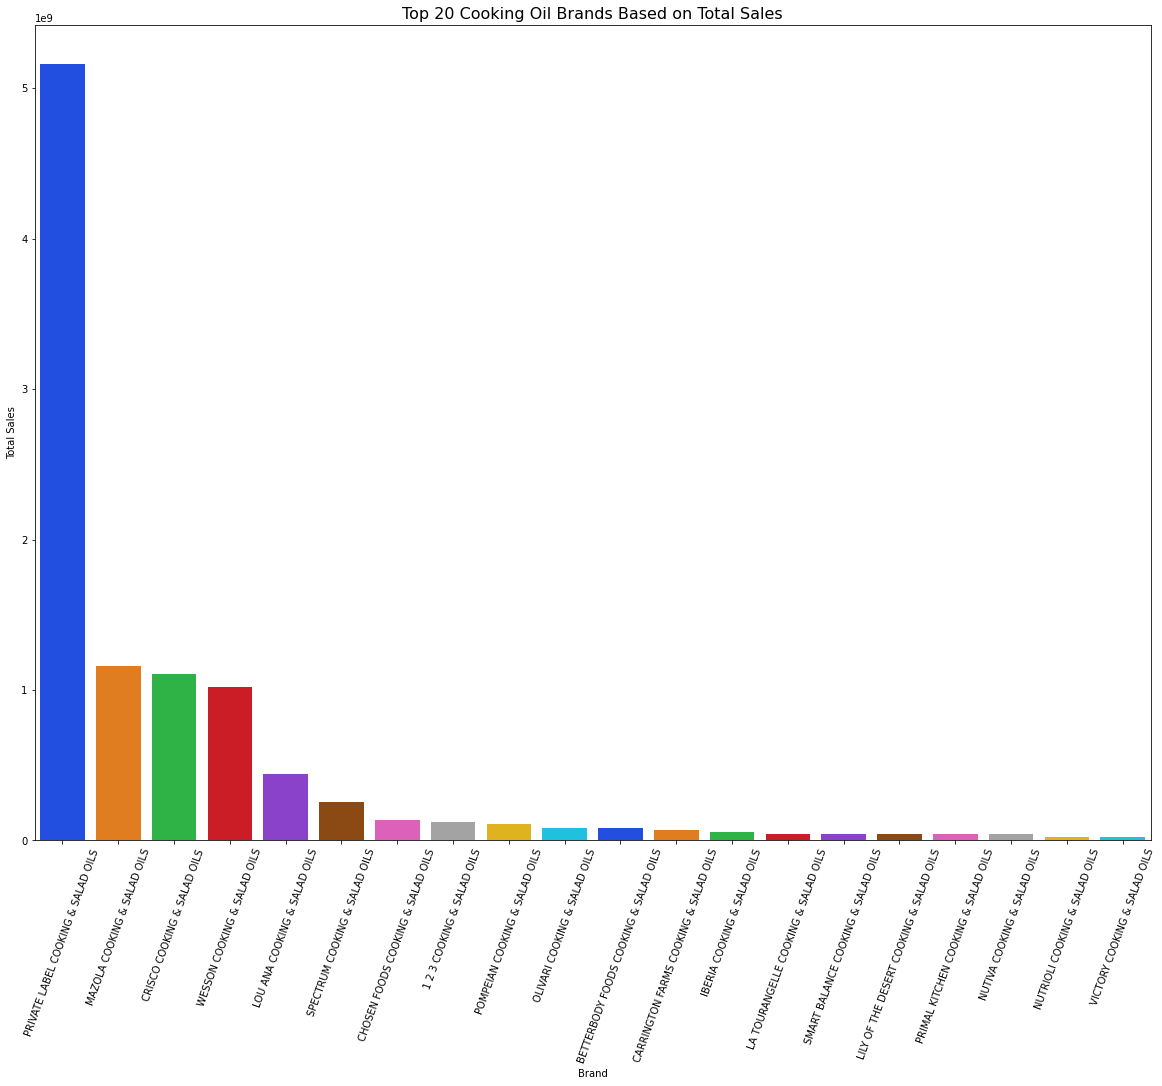

In [143]:
# Histogram for Top 20 Brands based on Total Sales
plt.figure(figsize = (20, 15))
sns.barplot(x= 'Brand', y = 'Total Sales', palette = 'bright', data = df_oil_US_tot_sales_by_brand_top20)
plt.xticks(rotation=70)
plt.xlabel('Brand')
plt.ylabel('Total Sales')
plt.title('Top 20 Cooking Oil Brands Based on Total Sales', fontsize = 16)
plt.show()

In [144]:
# Get the Butter Top 20 List based on Total Sales
df_oil_US_tot_sales_by_brand_top20_list = list(df_oil_US_tot_sales_by_brand_top20['Brand'])
df_oil_US_tot_sales_by_brand_top20_list

['PRIVATE LABEL COOKING & SALAD OILS',
 'MAZOLA COOKING & SALAD OILS',
 'CRISCO COOKING & SALAD OILS',
 'WESSON COOKING & SALAD OILS',
 'LOU ANA COOKING & SALAD OILS',
 'SPECTRUM COOKING & SALAD OILS',
 'CHOSEN FOODS COOKING & SALAD OILS',
 '1 2 3 COOKING & SALAD OILS',
 'POMPEIAN COOKING & SALAD OILS',
 'OLIVARI COOKING & SALAD OILS',
 'BETTERBODY FOODS COOKING & SALAD OILS',
 'CARRINGTON FARMS COOKING & SALAD OILS',
 'IBERIA COOKING & SALAD OILS',
 'LA TOURANGELLE COOKING & SALAD OILS',
 'SMART BALANCE COOKING & SALAD OILS',
 'LILY OF THE DESERT COOKING & SALAD OILS',
 'PRIMAL KITCHEN COOKING & SALAD OILS',
 'NUTIVA COOKING & SALAD OILS',
 'NUTRIOLI COOKING & SALAD OILS',
 'VICTORY COOKING & SALAD OILS']

In [145]:
# Make a Seperate Dataframe for Top 20 Brands 
df_oil_US_tol_sales_butter_top20_TS = df_oil_US[df_oil_US['Brand'].apply(lambda x: x in df_oil_US_tot_sales_by_brand_top20_list)]

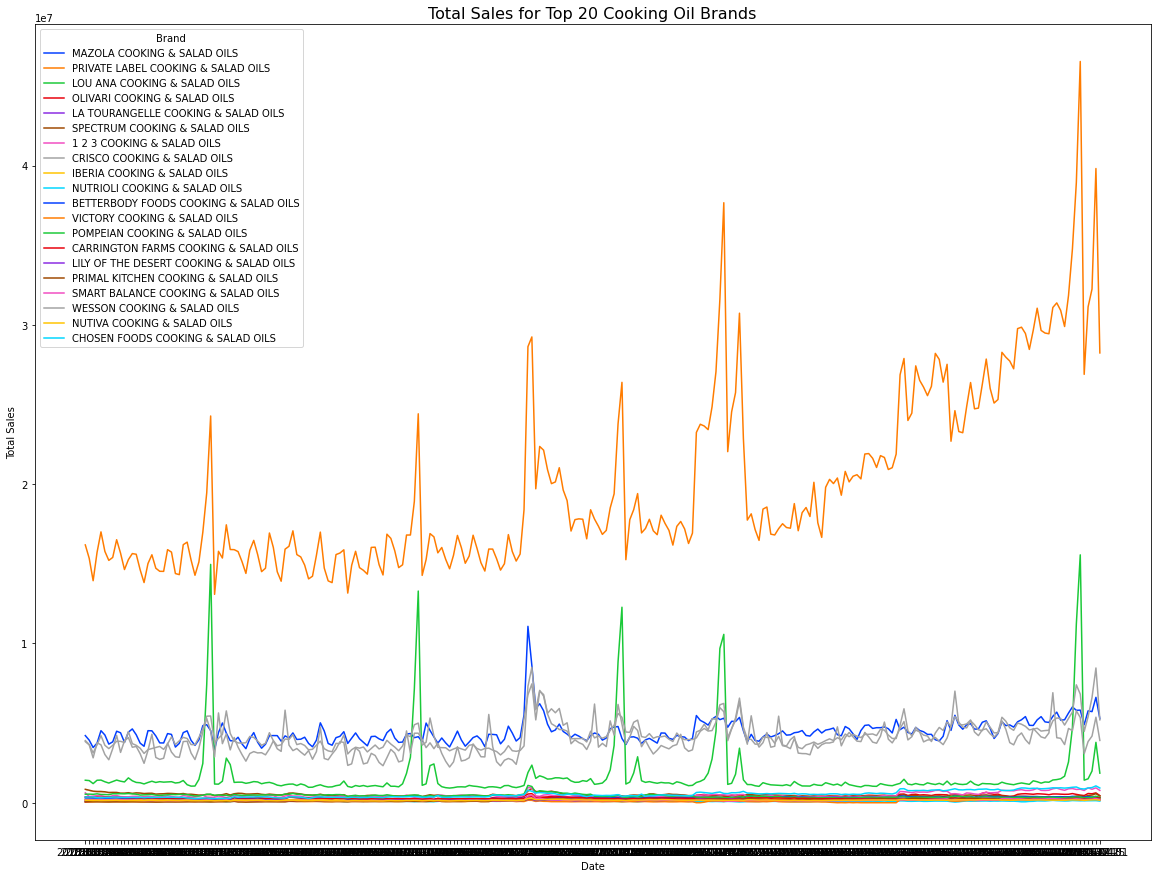

In [146]:
plt.figure(figsize = (20, 15))
sns.lineplot(x="Date", y = 'Total Sales', hue="Brand", palette = 'bright', data = df_oil_US_tol_sales_butter_top20_TS)
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Total Sales for Top 20 Cooking Oil Brands', fontsize = 16)
plt.show()

# Cooking Spray

In [147]:
df_spray = pd.read_csv('df_spray.csv')

In [148]:
df_spray_US = pd.read_csv('df_spray_US.csv')

In [149]:
df_spray['Promotion'].value_counts()*100/len(df_spray)

1    65.29472
0    34.70528
Name: Promotion, dtype: float64

In [150]:
# Check Unique Sub-Category Names
df_spray['Category'].unique()

array(['COOKING SPRAYS', nan], dtype=object)

In [151]:
len(df_spray_US['Manufacturer'].unique())

68

In [152]:
df_spray_US_Conagra = df_spray_US[df_spray_US['Manufacturer'] == 'CONAGRA BRANDS']
df_spray_US_Conagra['Brand'].unique()

array(['NATURALLY COOKING SPRAYS', 'PAM COOKING SPRAYS',
       'SMART BALANCE COOKING SPRAYS', 'WESCOAT COOKING SPRAYS'],
      dtype=object)

In [153]:
# Count the Total Number of Brands For Each Manufacturer
df_spray_US_manufacturer_count = df_spray_US.groupby('Manufacturer')['Brand'].nunique().sort_values(ascending = False).reset_index()
df_spray_US_manufacturer_count

Manufacturer  Brand
0               B & G FOODS INC.      5
1                 CONAGRA BRANDS      4
2            THE MANISCHEWITZ CO      3
3                   US FOODS INC      3
4               DELTA BRANDS INC      2
..                           ...    ...
62              HOMETOWN FOOD CO      1
63                      HONDURAS      1
64  ACETIFICIO MARCELLO DENIGRIS      1
65        JINDILLI BEVERAGES LLC      1
66                  WINONA FOODS      1

[67 rows x 2 columns]

In [154]:
# Count the Total Number of Brands For Congara Brands
df_spray_US_conagra = df_spray_US[df_spray_US['Manufacturer'].apply(lambda x: x in ["CONAGRA BRANDS"])]
df_spray_US_conagra_brands_count = df_spray_US_conagra.groupby('Manufacturer')['Brand'].nunique().sort_values(ascending = False)
df_spray_US_conagra_brands_count

Manufacturer
CONAGRA BRANDS    4
Name: Brand, dtype: int64

In [155]:
# Count the Total Number of Products For Each Manufacturer
df_spray_US_manufacturer_count2 = df_spray_US.groupby('Manufacturer')['Product'].nunique().sort_values(ascending = False).reset_index()
df_spray_US_manufacturer_count2

Manufacturer  Product
0               B & G FOODS INC.        5
1                 CONAGRA BRANDS        4
2            THE MANISCHEWITZ CO        3
3                   US FOODS INC        3
4               DELTA BRANDS INC        2
..                           ...      ...
62              HOMETOWN FOOD CO        1
63                      HONDURAS        1
64  ACETIFICIO MARCELLO DENIGRIS        1
65        JINDILLI BEVERAGES LLC        1
66                  WINONA FOODS        1

[67 rows x 2 columns]

In [156]:
# Count the Total Number of Products For Congara Brands
df_spray_US_manufacturer_conagra_products_count = df_spray_US_conagra.groupby('Manufacturer')['Product'].nunique().sort_values(ascending = False).reset_index()
df_spray_US_manufacturer_conagra_products_count

Manufacturer  Product
0  CONAGRA BRANDS        4

In [157]:
# Check the Total Base Dollar Sales
df_spray_US_US_base_dol_sale_tot = df_spray_US['Base Dollar Sales'].agg(['sum']).reset_index()
df_spray_US_US_base_dol_sale_tot

index  Base Dollar Sales
0   sum       2.073778e+09

## Check the Total Sales by CAG Manufacturer Value for Cooking Spray

In [158]:
# Check the Total Sales by CAG Manufacturer Value
df_spray_US_tol_sales_by_manufacturer = df_spray_US.groupby('Manufacturer').agg({'Total Sales': 'sum'}).sort_values(by = ['Total Sales'], ascending = False)
df_spray_US_tol_sales_by_manufacturer

Total Sales
Manufacturer                              
CONAGRA BRANDS                1.129136e+09
PRIVATE LABEL                 7.580108e+08
B & G FOODS INC.              1.203797e+08
POMPEIAN INC                  3.923757e+07
CHOSEN FOODS INC              3.351647e+07
...                                    ...
MARDONA SPECIALTY FOODS LTD   4.407366e+01
SHERWIN-WILLIAMS CO           3.175794e+01
CORAL INTERNACIONAL SA DE CV  2.255735e+01
COOKWELL                      1.490000e+01
ACETIFICIO MARCELLO DENIGRIS  8.580000e+00

[67 rows x 1 columns]

In [159]:
# Adjust the Dataframe about the Total Sales by Manufacturer
df_spray_US_tol_sales_by_manufacturer['Manufacturer'] = df_spray_US_tol_sales_by_manufacturer.index
df_spray_US_tol_sales_by_manufacturer['Rank'] = [i for i in range(1, 68)]
df_spray_US_tol_sales_by_manufacturer.set_index("Rank", inplace = True)
df_spray_US_tol_sales_by_manufacturer

Total Sales                  Manufacturer
Rank                                            
1     1.129136e+09                CONAGRA BRANDS
2     7.580108e+08                 PRIVATE LABEL
3     1.203797e+08              B & G FOODS INC.
4     3.923757e+07                  POMPEIAN INC
5     3.351647e+07              CHOSEN FOODS INC
...            ...                           ...
63    4.407366e+01   MARDONA SPECIALTY FOODS LTD
64    3.175794e+01           SHERWIN-WILLIAMS CO
65    2.255735e+01  CORAL INTERNACIONAL SA DE CV
66    1.490000e+01                      COOKWELL
67    8.580000e+00  ACETIFICIO MARCELLO DENIGRIS

[67 rows x 2 columns]

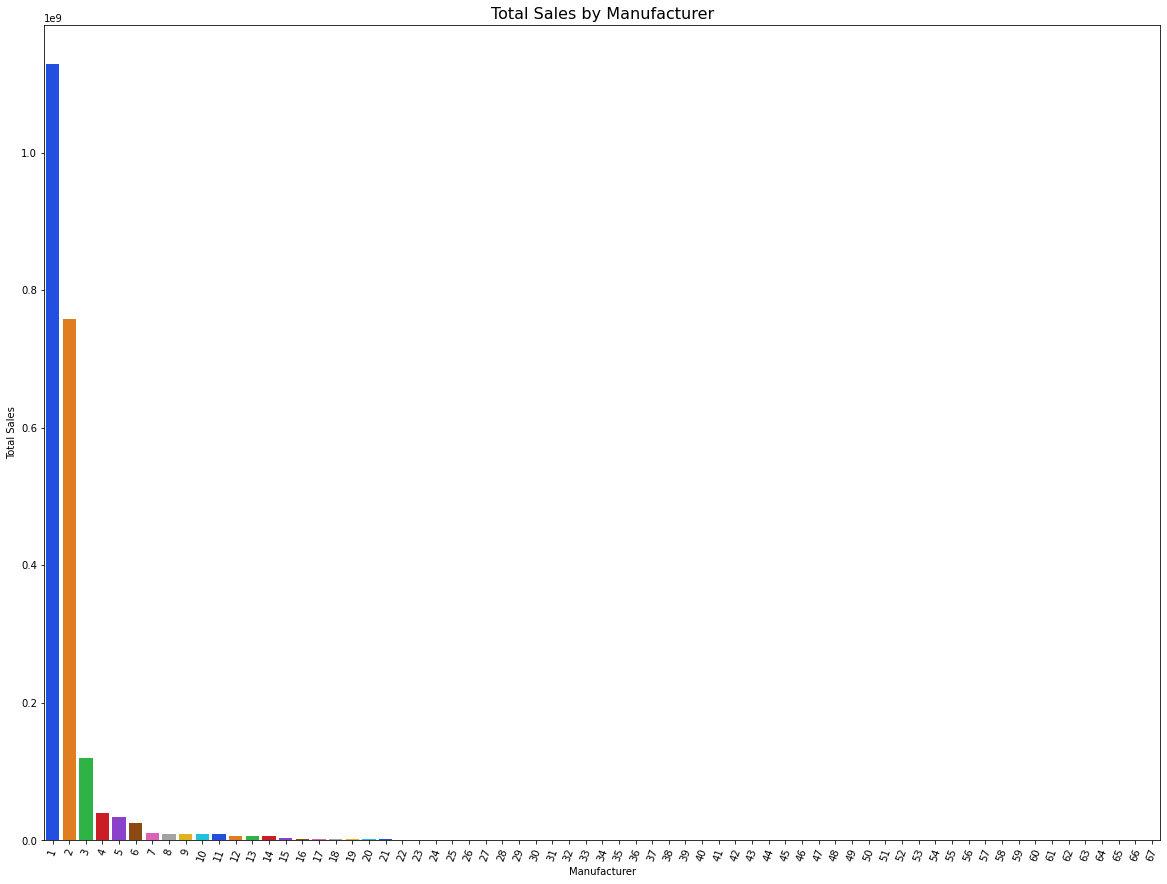

In [160]:
# Barplot for Total Sales by Manufacturer
plt.figure(figsize = (20, 15))
sns.barplot(x= df_spray_US_tol_sales_by_manufacturer.index, y = 'Total Sales', palette = 'bright', data = df_spray_US_tol_sales_by_manufacturer)
plt.xticks(rotation=70)
plt.xlabel('Manufacturer')
plt.ylabel('Total Sales')
plt.title('Total Sales by Manufacturer', fontsize = 16)
plt.show()

In [161]:
# Check the Rank of Conagra Brand and Make a Seperate Dataframe
df_spray_US_tol_sales_congara_manu = df_spray_US_tol_sales_by_manufacturer[df_spray_US_tol_sales_by_manufacturer['Manufacturer'] == 'CONAGRA BRANDS']
df_spray_US_tol_sales_congara_manu

Total Sales    Manufacturer
Rank                              
1     1.129136e+09  CONAGRA BRANDS

In [162]:
# Make a Seperate Dataframe for Top 5 Cooking Spray Manufacturer
df_spray_US_tol_sales_by_manufacturer_top5 = df_spray_US_tol_sales_by_manufacturer[df_spray_US_tol_sales_by_manufacturer.index <= 5]

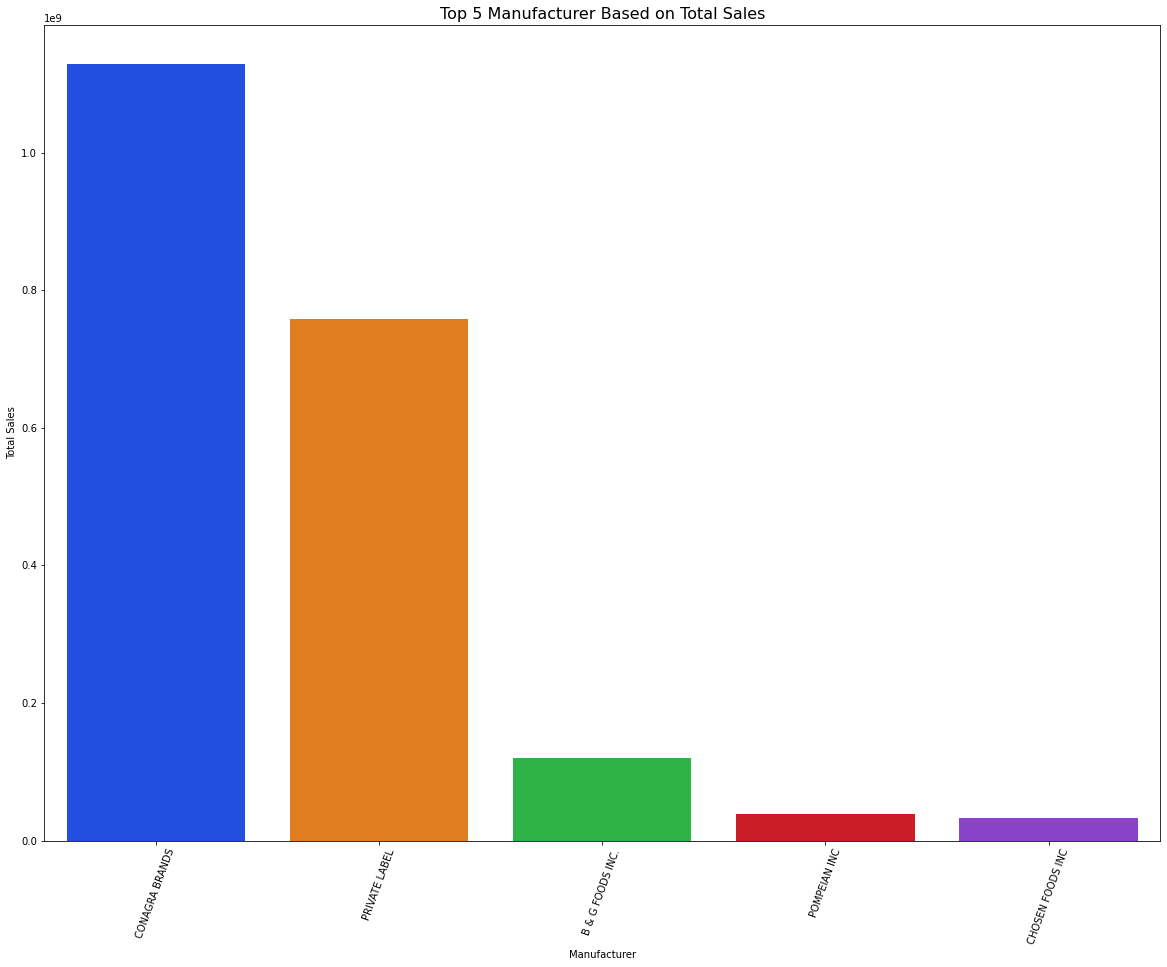

In [163]:
# Histogram for Top 20 Spray Manufacturer and Congara Brand based on Total Sales
plt.figure(figsize = (20, 15))
sns.barplot(x= 'Manufacturer', y = 'Total Sales', palette = 'bright', data = df_spray_US_tol_sales_by_manufacturer_top5)
plt.xticks(rotation=70)
plt.xlabel('Manufacturer')
plt.ylabel('Total Sales')
plt.title('Top 5 Manufacturer Based on Total Sales', fontsize = 16)
plt.show()

In [164]:
# Get the Top 5 Manufacturer List based on Total Sales
df_spray_US_tol_sales_by_manufacturer_top5_list = list(df_spray_US_tol_sales_by_manufacturer_top5['Manufacturer'])
df_spray_US_tol_sales_by_manufacturer_top5_list

['CONAGRA BRANDS',
 'PRIVATE LABEL',
 'B & G FOODS INC.',
 'POMPEIAN INC',
 'CHOSEN FOODS INC']

In [165]:
# Make a Seperate Dataframe for Top 5 Cooking Spray Manufacturer 
df_spray_US_tol_sales_by_manufacturer_top5_man_TS = df_spray_US[df_spray_US['Manufacturer'].apply(lambda x: x in df_spray_US_tol_sales_by_manufacturer_top5_list)]

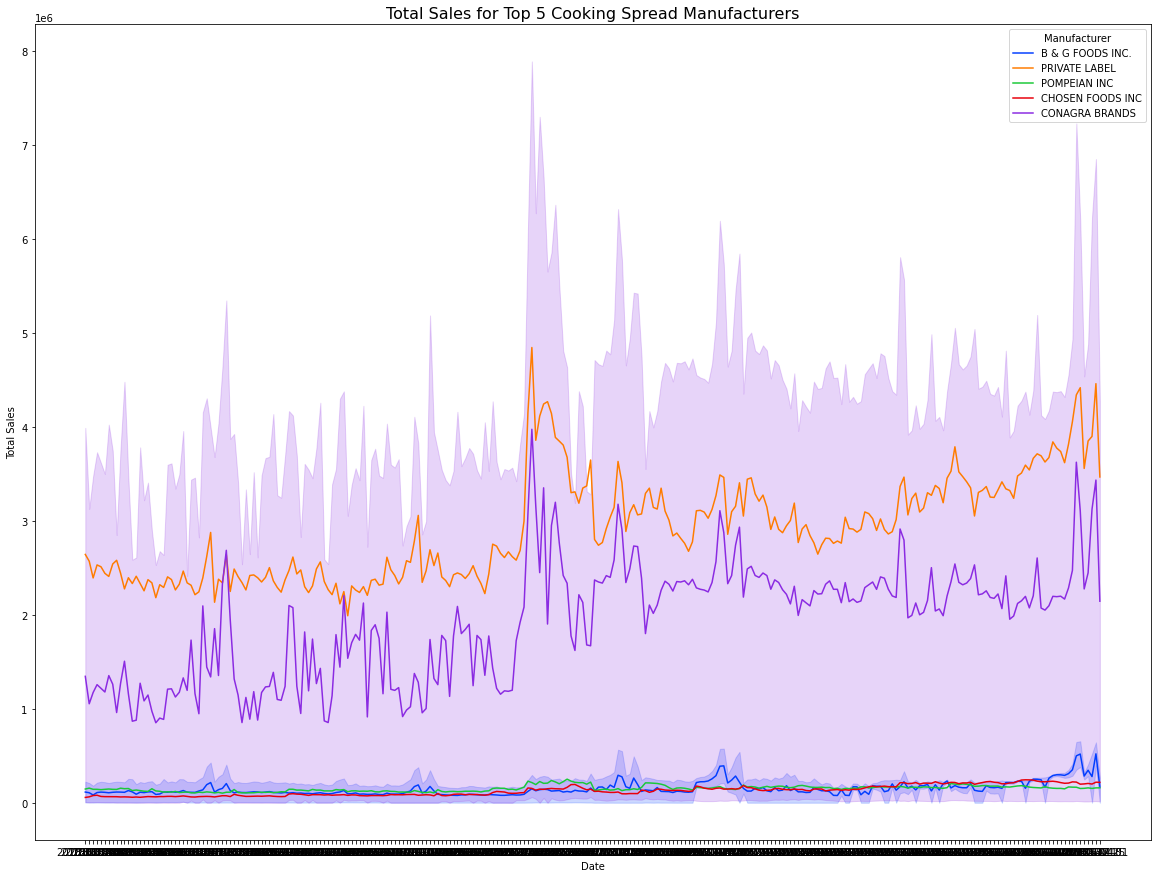

In [166]:
plt.figure(figsize = (20, 15))
sns.lineplot(x="Date", y = 'Total Sales', hue="Manufacturer", palette = 'bright', data = df_spray_US_tol_sales_by_manufacturer_top5_man_TS)
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Total Sales for Top 5 Cooking Spread Manufacturers', fontsize = 16)
plt.show()

## Check the Total Sales by Marjor Brand Value for Cooking Spray

In [167]:
df_spray_US_tot_sales_by_brand = df_spray_US.groupby('Brand').agg({'Total Sales': 'sum'}).sort_values(by = ['Total Sales'], ascending = False).reset_index()
df_spray_US_tot_sales_by_brand

Brand   Total Sales
0             PAM COOKING SPRAYS  1.122114e+09
1   PRIVATE LABEL COOKING SPRAYS  7.580108e+08
2      BAKERS JOY COOKING SPRAYS  6.253785e+07
3          CRISCO COOKING SPRAYS  5.709830e+07
4        POMPEIAN COOKING SPRAYS  3.923757e+07
..                           ...           ...
77        MARDONA COOKING SPRAYS  4.407366e+01
78            PAN COOKING SPRAYS  3.175794e+01
79         OLEICO COOKING SPRAYS  2.255735e+01
80       COOKWELL COOKING SPRAYS  1.490000e+01
81      DE NIGRIS COOKING SPRAYS  8.580000e+00

[82 rows x 2 columns]

In [168]:
# Adjust the Dataframe about the Total sales by Brand
df_spray_US_tot_sales_by_brand['Rank'] = [i for i in range(1, 83)]
df_spray_US_tot_sales_by_brand.set_index("Rank", inplace = True)
df_spray_US_tot_sales_by_brand

Brand   Total Sales
Rank                                            
1               PAM COOKING SPRAYS  1.122114e+09
2     PRIVATE LABEL COOKING SPRAYS  7.580108e+08
3        BAKERS JOY COOKING SPRAYS  6.253785e+07
4            CRISCO COOKING SPRAYS  5.709830e+07
5          POMPEIAN COOKING SPRAYS  3.923757e+07
...                            ...           ...
78          MARDONA COOKING SPRAYS  4.407366e+01
79              PAN COOKING SPRAYS  3.175794e+01
80           OLEICO COOKING SPRAYS  2.255735e+01
81         COOKWELL COOKING SPRAYS  1.490000e+01
82        DE NIGRIS COOKING SPRAYS  8.580000e+00

[82 rows x 2 columns]

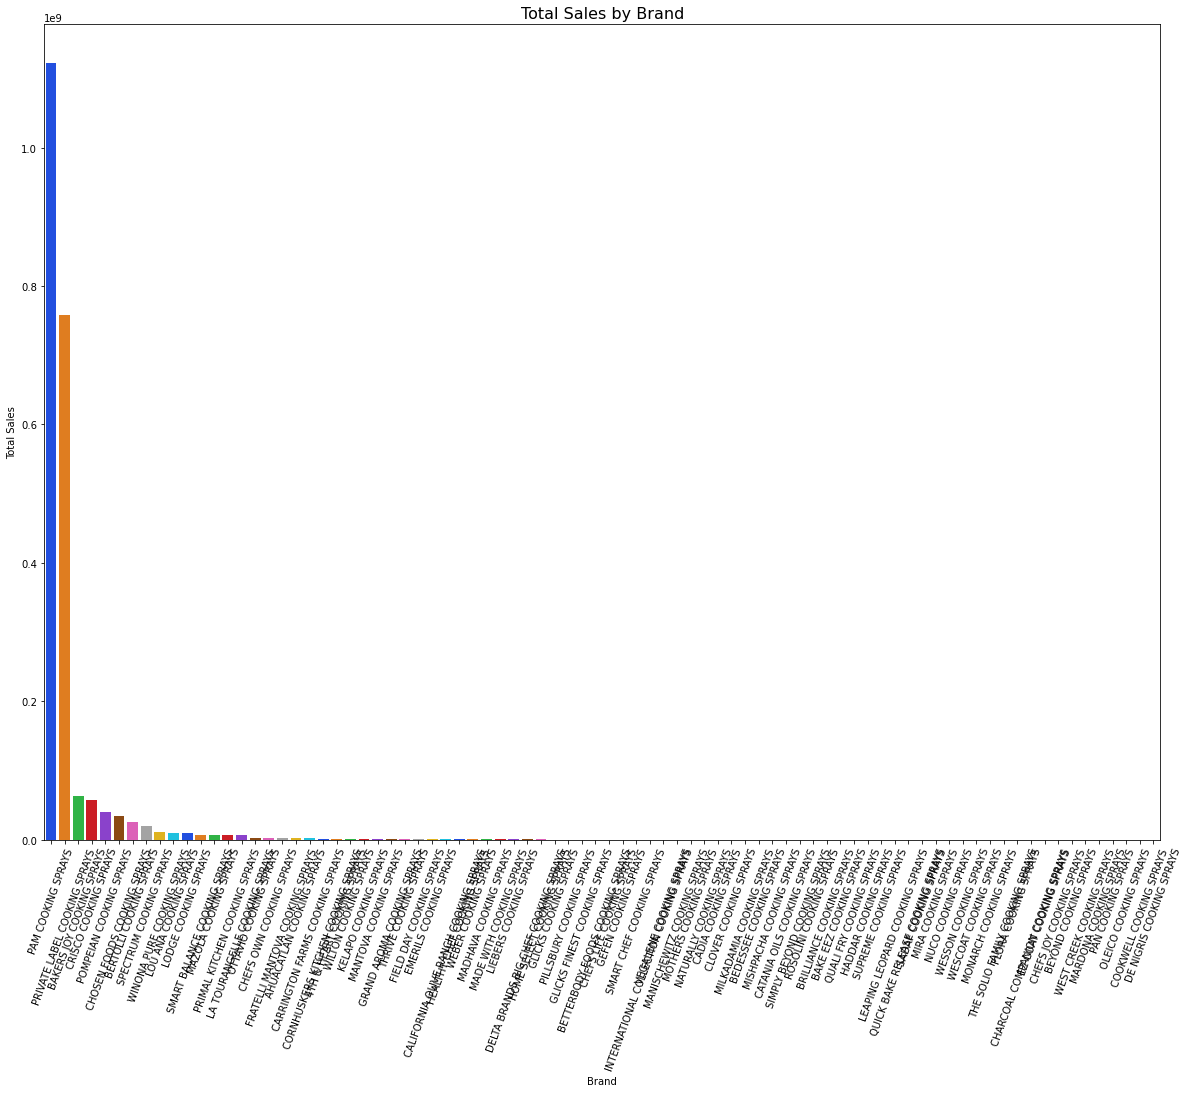

In [169]:
# Barplot for Total Sales by Brand
plt.figure(figsize = (20, 15))
sns.barplot(x= df_spray_US_tot_sales_by_brand['Brand'], y = 'Total Sales', palette = 'bright', data = df_spray_US_tot_sales_by_brand)
plt.xticks(rotation=70)
plt.xlabel('Brand')
plt.ylabel('Total Sales')
plt.title('Total Sales by Brand', fontsize = 16)
plt.show()

In [170]:
# Check the Rank of Conagra Brand and Make a Seperate Dataframe
df_spray_US_tot_sales_congara = df_spray_US_tot_sales_by_brand[df_spray_US_tot_sales_by_brand['Brand'].apply(lambda x: x in ['NATURALLY COOKING SPRAYS', 'PAM COOKING SPRAYS',
       'SMART BALANCE COOKING SPRAYS', 'WESCOAT COOKING SPRAYS'])]
df_spray_US_tot_sales_congara

Brand   Total Sales
Rank                                            
1               PAM COOKING SPRAYS  1.122114e+09
12    SMART BALANCE COOKING SPRAYS  6.978818e+06
49        NATURALLY COOKING SPRAYS  4.196146e+04
69          WESCOAT COOKING SPRAYS  1.273057e+03

In [171]:
# Make a Seperate Dataframe for Top 20 Cooking Spray Brands
df_spray_US_tot_sales_by_brand_top20 = df_spray_US_tot_sales_by_brand[df_spray_US_tot_sales_by_brand.index <= 20]

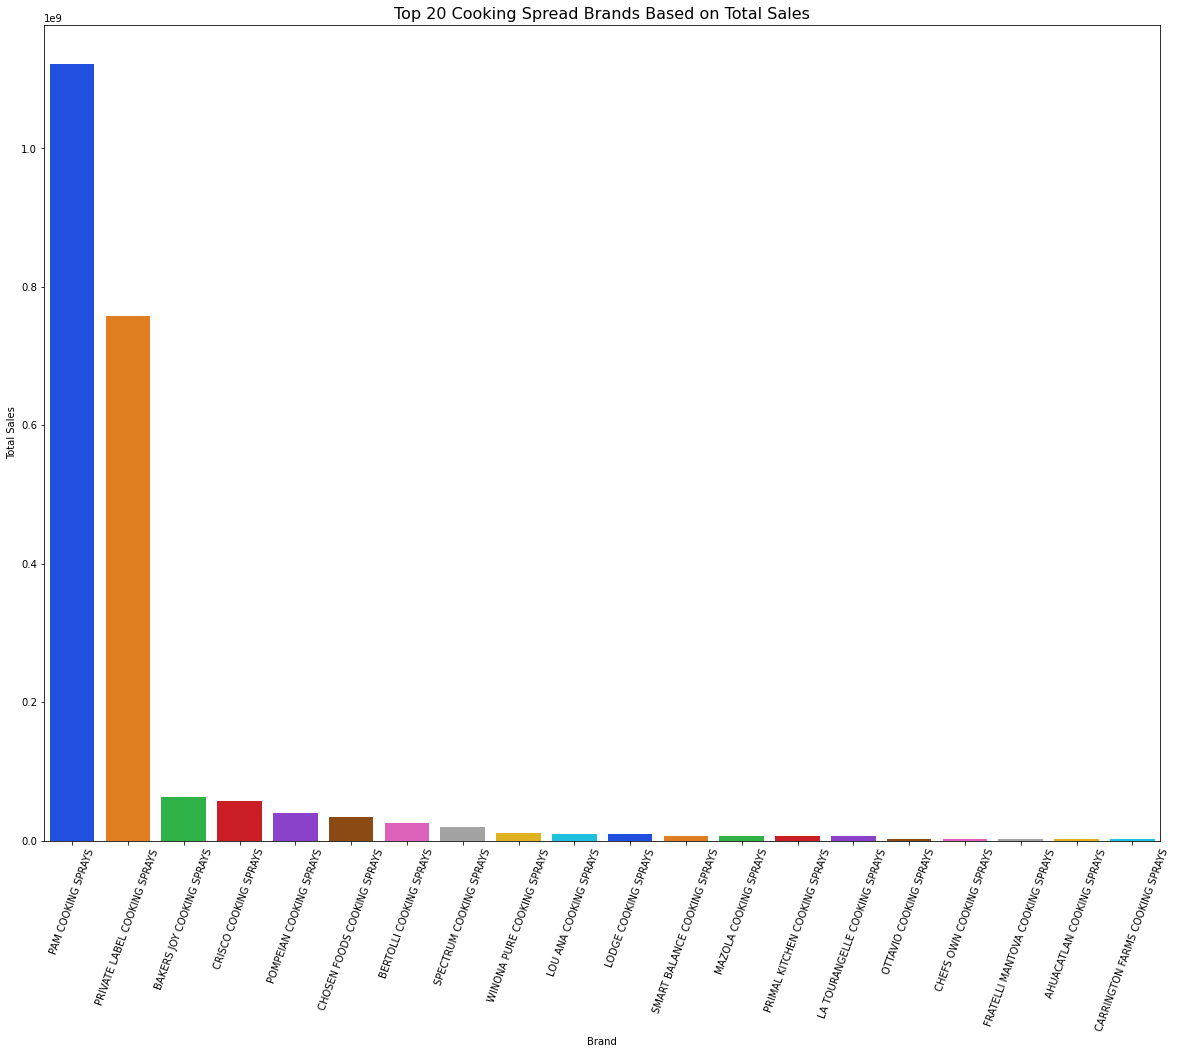

In [172]:
# Histogram for Top 20 Spray Brands based on Total Sales
plt.figure(figsize = (20, 15))
sns.barplot(x= 'Brand', y = 'Total Sales', palette = 'bright', data = df_spray_US_tot_sales_by_brand_top20)
plt.xticks(rotation=70)
plt.xlabel('Brand')
plt.ylabel('Total Sales')
plt.title('Top 20 Cooking Spread Brands Based on Total Sales', fontsize = 16)
plt.show()

In [173]:
# Get the Spray Top 20 List based on Total Sales
df_spray_US_tot_sales_by_brand_top20_list = list(df_spray_US_tot_sales_by_brand_top20['Brand'])
df_spray_US_tot_sales_by_brand_top20_list

['PAM COOKING SPRAYS',
 'PRIVATE LABEL COOKING SPRAYS',
 'BAKERS JOY COOKING SPRAYS',
 'CRISCO COOKING SPRAYS',
 'POMPEIAN COOKING SPRAYS',
 'CHOSEN FOODS COOKING SPRAYS',
 'BERTOLLI COOKING SPRAYS',
 'SPECTRUM COOKING SPRAYS',
 'WINONA PURE COOKING SPRAYS',
 'LOU ANA COOKING SPRAYS',
 'LODGE COOKING SPRAYS',
 'SMART BALANCE COOKING SPRAYS',
 'MAZOLA COOKING SPRAYS',
 'PRIMAL KITCHEN COOKING SPRAYS',
 'LA TOURANGELLE COOKING SPRAYS',
 'OTTAVIO COOKING SPRAYS',
 'CHEFS OWN COOKING SPRAYS',
 'FRATELLI MANTOVA COOKING SPRAYS',
 'AHUACATLAN COOKING SPRAYS',
 'CARRINGTON FARMS COOKING SPRAYS']

In [174]:
# Make a Seperate Dataframe for Top 20 Brands 
df_spray_US_tot_sales_by_brand_top20_TS = df_spray_US[df_spray_US['Brand'].apply(lambda x: x in df_spray_US_tot_sales_by_brand_top20_list)]

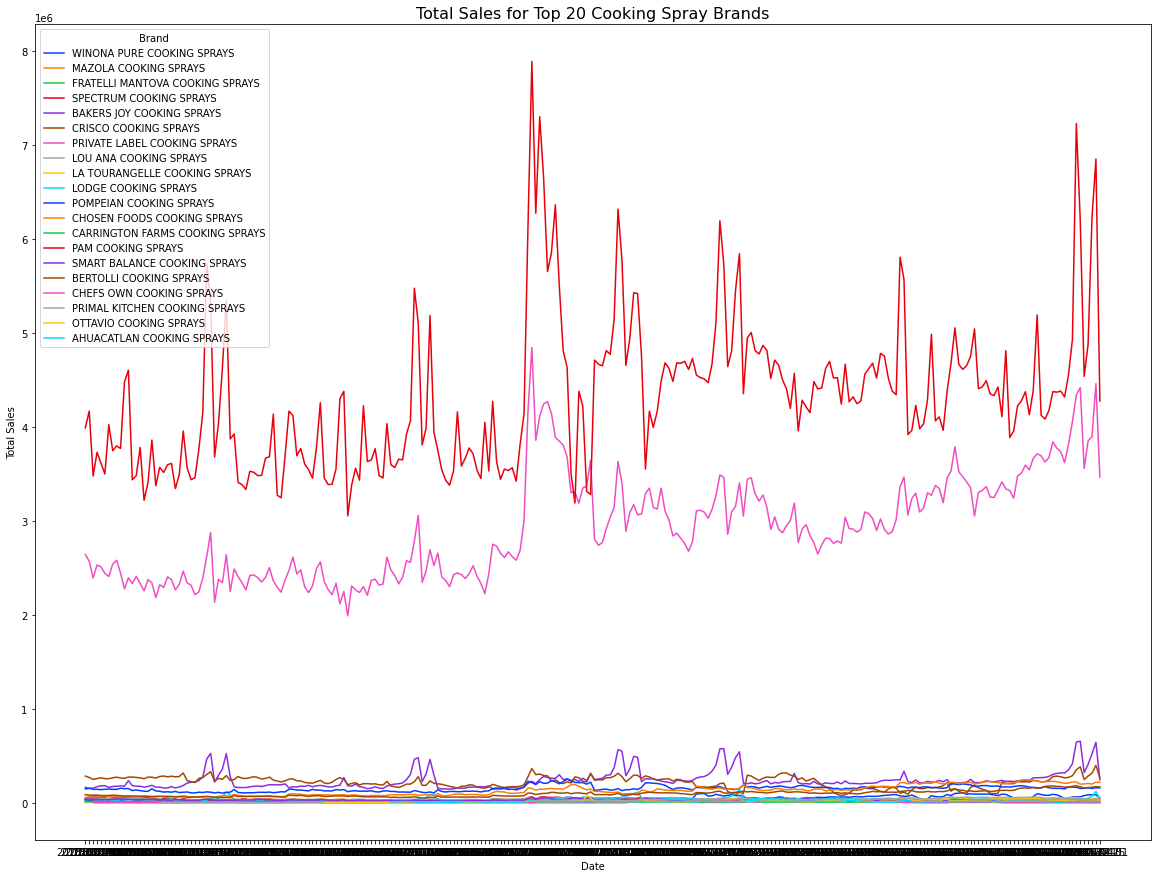

In [175]:
plt.figure(figsize = (20, 15))
sns.lineplot(x="Date", y = 'Total Sales', hue="Brand", palette = 'bright', data = df_spray_US_tot_sales_by_brand_top20_TS)
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Total Sales for Top 20 Cooking Spray Brands', fontsize = 16)
plt.show()

# Exploring Different Datasets

In [176]:
pd.options.display.float_format = '{:.2f}'.format

In [177]:
df_tablespreads_US_tot_sal_by_year = df_tablespreads_US.groupby('Year')['Total Sales'].agg(['sum'])
df_tablespreads_US_tot_sal_by_year

sum
Year              
2018 3931065983.46
2019 4008196031.80
2020 4753616960.49
2021 4216322537.43
2022 5023678726.19
2023  101355599.19

In [178]:
df_tablespreads_US_butter_tot_sal_by_year = df_tablespreads_US_butter.groupby('Year')['Total Sales'].agg(['sum'])
df_tablespreads_US_butter_tot_sal_by_year

sum
Year              
2018 2659396963.63
2019 2743333676.20
2020 3344972640.76
2021 2923039185.42
2022 3418443932.66
2023   69576406.56

In [179]:
df_tablespreads_US_mar_tot_sal_by_year = df_tablespreads_US_margarine.groupby('Year')['Total Sales'].agg(['sum'])
df_tablespreads_US_mar_tot_sal_by_year

sum
Year              
2018 1271669019.83
2019 1264862355.60
2020 1408644319.73
2021 1293283352.02
2022 1605234793.53
2023   31779192.62

In [180]:
df_oil_US_tot_sal_by_year = df_oil_US.groupby('Year')['Total Sales'].agg(['sum'])
df_oil_US_tot_sal_by_year

sum
Year              
2018 1770219297.63
2019 1753578020.91
2020 2087974069.45
2021 2170141167.80
2022 2698622736.62
2023   51697847.21